In [64]:
%matplotlib inline
import random
import time 
import torch
import torch.nn as nn
from torch.nn import init
import numpy as np
import pandas as pd
from IPython import display
from collections import OrderedDict
import sys
import d2lzh as d2l
from matplotlib import pyplot as plt

print(pd)


<module 'pandas' (namespace)>


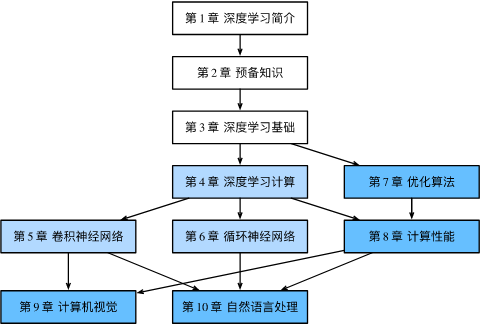

# 2 预备知识

## 2.2 数据操作

### 2.2.1创建 `tensor`

In [163]:
# 创建⼀个5x3的未初始化的 Tensor
x = torch.empty(5,3)
x

tensor([[1.0286e-38, 1.0653e-38, 1.0194e-38],
        [8.4490e-39, 1.0469e-38, 9.3674e-39],
        [9.9184e-39, 8.7245e-39, 9.2755e-39],
        [8.9082e-39, 9.9184e-39, 8.4490e-39],
        [9.6429e-39, 1.0653e-38, 1.0469e-38]])

In [164]:
# 创建⼀个5x3的随机初始化的 Tensor :
x = torch.rand(5,3)
x

tensor([[0.2475, 0.5785, 0.4930],
        [0.8624, 0.1975, 0.8793],
        [0.0370, 0.3336, 0.4633],
        [0.1396, 0.3209, 0.1564],
        [0.2538, 0.8468, 0.1671]])

In [165]:
# 创建⼀个5x3的long型全0的 Tensor :
x = torch.zeros(5,3,dtype = torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [166]:
# 直接创建
x = torch.tensor([5.5,2])
x

tensor([5.5000, 2.0000])

In [167]:
# 通过现有的tensor插件，会默认重用输入tensor的一些属性，如数据类型等，除非自定义数据类型
x = x.new_ones(5, 3, dtype = torch.float64)
# 返回的tensor默认具有相同的torch.dtype和torch.device
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [168]:
# 制定新的数据类型
x = torch.randn_like(x, dtype=torch.float)
x

tensor([[-1.2324, -0.3250,  0.4171],
        [ 0.4368,  1.0193,  0.8029],
        [-0.1245,  0.3772, -0.1379],
        [-1.1019,  2.3555, -0.2890],
        [-1.9084, -0.9716, -0.7206]])

In [169]:
# 可以通过哦shape,size()来获取tensor的形状
x.size(),x.shape

(torch.Size([5, 3]), torch.Size([5, 3]))

> 注意：返回的torch.Size其实就是一个tuple, 支持所有tuple的操作。 

还有很多函数可以创建`Tensor`，去翻翻官方API就知道了，下表给了一些常用的作参考。

|函数|功能|
|:---:|:---:|
|Tensor(*sizes)|基础构造函数|
|tensor(data,)|类似np.array的构造函数|
|ones(*sizes)|全1Tensor|
|zeros(*sizes)|全0Tensor|
|eye(*sizes)|对角线为1，其他为0|
|arange(s,e,step)|从s到e，步长为step|
|linspace(s,e,steps)|从s到e，均匀切分成steps份|
|rand/randn(*sizes)|均匀/标准分布|
|normal(mean,std)/uniform(from,to)|正态分布/均匀分布|
|randperm(m)|随机排列|

这些创建方法都可以在创建的时候指定数据类型dtype和存放device(cpu/gpu)。

### 2.2.2 操作

#### 加法

In [170]:
y = torch.rand(5,3)
y = torch.rand(5,3)

# 加法形式1：
print(x + y )

# 加法形式2：
print(torch.add(x,y))
#还可以指定输出
res = torch.empty(5,3)
torch.add(x,y,out=res)
print(res)

# 加法形式3：
y.add_(x)
y

tensor([[-0.4729,  0.6191,  1.3751],
        [ 0.7469,  1.6783,  1.0127],
        [ 0.4769,  1.0914, -0.1163],
        [-0.6928,  2.6008,  0.2075],
        [-1.3178, -0.4104, -0.1003]])
tensor([[-0.4729,  0.6191,  1.3751],
        [ 0.7469,  1.6783,  1.0127],
        [ 0.4769,  1.0914, -0.1163],
        [-0.6928,  2.6008,  0.2075],
        [-1.3178, -0.4104, -0.1003]])
tensor([[-0.4729,  0.6191,  1.3751],
        [ 0.7469,  1.6783,  1.0127],
        [ 0.4769,  1.0914, -0.1163],
        [-0.6928,  2.6008,  0.2075],
        [-1.3178, -0.4104, -0.1003]])


tensor([[-0.4729,  0.6191,  1.3751],
        [ 0.7469,  1.6783,  1.0127],
        [ 0.4769,  1.0914, -0.1163],
        [-0.6928,  2.6008,  0.2075],
        [-1.3178, -0.4104, -0.1003]])

#### 索引

In [171]:
# 索引出来的结果与原数据共享内存，也即修改⼀个，另⼀个会跟着修改
y = x[0,:]
y += 1

y,x[0,:]

(tensor([-0.2324,  0.6750,  1.4171]), tensor([-0.2324,  0.6750,  1.4171]))

In [172]:
y = torch.index_select(x,1,2,*,y)
y

SyntaxError: invalid syntax (<ipython-input-172-a7743ddc4e52>, line 1)

除了常用的索引选择数据之外，PyTorch还提供了一些高级的选择函数:

|函数|	功能|
|:---:|:---:|
|index_select(input, dim, index)|在指定维度dim上选取，比如选取某些行、某些列|
|masked_select(input, mask)|例子如上，a[a>0]，使用ByteTensor进行选取|
|nonzero(input)|	非0元素的下标|
|gather(input, dim, index)|根据index，在dim维度上选取数据，输出的size与index一样|

这里不详细介绍，用到了再查官方文档。

#### 改变形状

In [173]:
# view()返回的新tensor与源tensor共享内存
# view仅改变了观察方式
y = x.view(15)
z = x.view(-1,5)

x.size(),y.size(),z.size()

(torch.Size([5, 3]), torch.Size([15]), torch.Size([3, 5]))

In [174]:
x += 1

print(x)
print(y)

tensor([[ 0.7676,  1.6750,  2.4171],
        [ 1.4368,  2.0193,  1.8029],
        [ 0.8755,  1.3772,  0.8621],
        [-0.1019,  3.3555,  0.7110],
        [-0.9084,  0.0284,  0.2794]])
tensor([ 0.7676,  1.6750,  2.4171,  1.4368,  2.0193,  1.8029,  0.8755,  1.3772,
         0.8621, -0.1019,  3.3555,  0.7110, -0.9084,  0.0284,  0.2794])


In [175]:
# 如果我们想返回⼀个真正新的副本（即不共享内存）
#Pytorch还提供了⼀个 reshape() 可以改变形状，但是此函数并不能保证返回的是其拷⻉，所以不推荐使⽤
# 推荐先⽤ clone 创造⼀个副本然后再使⽤ view

x_cp = x.clone().view(15)
x -= 1

print(x)
print(x_cp)

tensor([[-0.2324,  0.6750,  1.4171],
        [ 0.4368,  1.0193,  0.8029],
        [-0.1245,  0.3772, -0.1379],
        [-1.1019,  2.3555, -0.2890],
        [-1.9084, -0.9716, -0.7206]])
tensor([ 0.7676,  1.6750,  2.4171,  1.4368,  2.0193,  1.8029,  0.8755,  1.3772,
         0.8621, -0.1019,  3.3555,  0.7110, -0.9084,  0.0284,  0.2794])


> 使用`clone`还有一个好处是会被记录在计算图中，即梯度回传到副本时也会传到源`Tensor`。

In [176]:
# item()将一个标量tensor转变成numpy
# only one element tensors can be converted to Python scalars
x = torch.randn(1)
x,x.item()

(tensor([0.8057]), 0.8057039380073547)

#### 线性代数
另外，PyTorch还支持一些线性函数，这里提一下，免得用起来的时候自己造轮子，具体用法参考官方文档。如下表所示：

| 函数	|功能|
|:---:|:---:|
|trace|	对角线元素之和(矩阵的迹)|
|diag|	对角线元素|
|triu/tril	|矩阵的上三角/下三角，可指定偏移量|
|mm/bmm	|矩阵乘法，batch的矩阵乘法|
|addmm/addbmm/addmv/addr/baddbmm..|	矩阵运算|
|t|转置|
|dot/cross|	内积/外积|
|inverse	|求逆矩阵|
|svd	|奇异值分解|

### 2.2.3 广播机制

前面我们看到如何对两个形状相同的`Tensor`做按元素运算。

当对两个形状不同的`Tensor`按元素运算时，可能会触发广播（broadcasting）机制：

先适当复制元素使这两个`Tensor`形状相同后再按元素运算。

In [177]:
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


由于 x 和 y 分别是1⾏2列和3⾏1列的矩阵，如果要计算 x + y ，那么 x 中第⼀⾏的2个元素被⼴播
（复制）到了第⼆⾏和第三⾏，⽽ y 中第⼀列的3个元素被⼴播（复制）到了第⼆列。如此，就可以对2
个3⾏2列的矩阵按元素相加

### 2.2.4运算的内存开销

前⾯说了，索引、 view 是不会开辟新内存的，⽽像 y = x + y 这样的运算是会新开内存的，然后将 y 指向新内存为了演示这⼀点，我们可以使⽤Python⾃带的 id 函数：如果两个实例的ID⼀致，那么它们所对应的内存地址相同；反之则不同

In [178]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
y_id = id(y)
y = y + x
y_id_ = id(y)

y_id,y_id_,y_id - y_id_

(1690813872512, 1690813871872, 640)

如果想指定结果到原来的 y 的内存，我们可以使⽤前⾯介绍的索引来进⾏替换操作。在下⾯的例⼦中，我们把 x + y 的结果通过 [:] 写进 y 对应的内存中。

In [179]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
y_id = id(y)
y[:] = y + x
y_id_ = id(y)

y_id,y_id_,y_id - y_id_

(1690815021568, 1690815021568, 0)

我们还可以使⽤运算符全名函数中的 out 参数或者⾃加运算符 += (也即 add_() )达到上述效果，例如
torch.add(x, y, out=y) 和 y += x ( y.add_(x) )。

In [180]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
y_id = id(y)
torch.add(x,y,out=y)# or y += x, y.add_(x)
y_id_ = id(y)

y_id,y_id_,y_id == y_id

(1690815021952, 1690815021952, True)

### 2.2.5 TENSOR 和NUMPY相互转换

Notes: tensor和numpy中的数组也共享内存,（所以他们之间的转换很
快），改变其中⼀个时另⼀个也会改变！！

#### numpy中的array转换成tensor
需要注意的是，此⽅法总是会进⾏数据拷⻉（就会消耗更多的时间和空间），所以返回的 Tensor 和原来的数
据不再共享内存。


In [181]:
a = np.ones(3)
b = torch.from_numpy(a)

a += 1
a,b

(array([2., 2., 2.]), tensor([2., 2., 2.], dtype=torch.float64))

In [182]:
# 法2
b = torch.tensor(a)

a,b

(array([2., 2., 2.]), tensor([2., 2., 2.], dtype=torch.float64))

所有在CPU上的 Tensor （除了 CharTensor ）都⽀持与NumPy数组相互转换

#### tensor转numpy

In [183]:
a = torch.ones(2)
b = a.numpy()

a += 1

a,b

(tensor([2., 2.]), array([2., 2.], dtype=float32))

### 2.2.6 TENSOR ON GPU
用方法`to()`可以将`Tensor`在CPU和GPU（需要硬件支持）之间相互移动。


In [184]:
# 以下代码只有在PyTorch GPU版本上才会执行
if torch.cuda.is_available():
    device = torch.device("cuda")          # GPU
    y = torch.ones_like(x, device=device)  # 直接创建一个在GPU上的Tensor
    x = x.to(device)                       # 等价于 .to("cuda")
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # to()还可以同时更改数据类型

## 2.3 ⾃动求梯度

在深度学习中，我们经常需要对函数求梯度（gradient）。PyTorch提供的autograd 包能够根据输⼊
和前向传播过程⾃动构建计算图，并执⾏反向传播。

### 2.3.1 概念

上一节介绍的`Tensor`是这个包的核心类，如果将其属性`.requires_grad`设置为`True`，它将开始追踪(track)在其上的所有操作（这样就可以利用链式法则进行梯度传播了）。完成计算后，可以调用`.backward()`来完成所有梯度计算。此`Tensor`的梯度将累积到`.grad`属性中。
> 注意在`y.backward()`时，如果`y`是标量，则不需要为`backward()`传入任何参数；否则，需要传入一个与`y`同形的`Tensor`。解释见 2.3.2 节。

如果不想要被继续追踪，可以调⽤ .detach() 将其从追踪记录中分离出来，这样就可以防⽌将来的计算被追踪，这样梯度就传不过去了。此外，还可以⽤ with torch.no_grad() 将不想被追踪的操作代码块包裹起来，这种⽅法在评估模型的时候很常⽤，因为在评估模型时，我们并不需要计算可训练参数（ requires_grad=True ）的梯度。

Function 是另外⼀个很᯿要的类。 Tensor 和 Function 互相结合就可以构建⼀个记录有整个计算过程的有向⽆环图（DAG）。每个 Tensor 都有⼀个 .grad_fn 属性，该属性即创建该 Tensor 的Function , 就是说该 Tensor 是不是通过某些运算得到的，若是，则 grad_fn 返回⼀个与这些运算相关的对象，否则是None。

### 2.3.2 `Tensor`

In [185]:
# 即把x当做变量
x = torch.ones(2,2,requires_grad = True)
x,x.grad_fn

(tensor([[1., 1.],
         [1., 1.]], requires_grad=True),
 None)

In [186]:
# 做一下运算

y = x +2
y,y.grad_fn

(tensor([[3., 3.],
         [3., 3.]], grad_fn=<AddBackward0>),
 <AddBackward0 at 0x189ac97ca60>)

注意x是直接创建的，所以它没有 grad_fn , ⽽y是通过⼀个加法操作创建的，所以它有⼀个为
<AddBackward> 的 grad_fn 

In [187]:
# 像x这种直接创建的称为叶⼦节点，叶⼦节点对应的 grad_fn 是 None 。
print(x.is_leaf,y.is_leaf)

True False


In [188]:
# 可以从grad_fn看出本次的操作 or 运算
z = y ** 2 * 3
out = z.mean()

print(z)
print(z.grad_fn)
print()
print(out)
print(out.grad_fn)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)

tensor(27., grad_fn=<MeanBackward0>)


通过`.requires_grad_()`来用in-place的方式改变`requires_grad`属性：


In [189]:
a = torch.randn(2, 2) # 缺失情况下默认 requires_grad = False
a = ((a * 3) / (a - 1))
print(a.requires_grad) # False
a.requires_grad_(True)
print(a.requires_grad) # True
b = (a * a).sum()
print(b.grad_fn)

False
True


### 2.3.3 梯度


In [190]:
#  因为 out 是⼀个标量，所以调⽤ backward() 时不需要指定求导变量
out.backward()

 我们来看看`out`关于`x`的梯度 $\frac{d(out)}{dx}$:


In [191]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


我们令`out`为 $o$ , 因为
$$
o=\frac14\sum_{i=1}^4z_i=\frac14\sum_{i=1}^43(x_i+2)^2
$$
所以
$$
\frac{\partial{o}}{\partial{x_i}}\bigr\rvert_{x_i=1}=\frac{9}{2}=4.5
$$
所以上面的输出是正确的。

数学上，如果有一个函数值和自变量都为向量的函数 $\vec{y}=f(\vec{x})$, 那么 $\vec{y}$ 关于 $\vec{x}$ 的梯度就是一个雅可比矩阵（Jacobian matrix）:
$$
J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)
$$
而``torch.autograd``这个包就是用来计算一些雅克比矩阵的乘积的。例如，如果 $v$ 是一个标量函数的 $l=g\left(\vec{y}\right)$ 的梯度：
$$
v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)
$$
那么根据链式法则我们有 $l$ 关于 $\vec{x}$ 的雅克比矩阵就为:
$$
v J=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right) \left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)=\left(\begin{array}{ccc}\frac{\partial l}{\partial x_{1}} & \cdots & \frac{\partial l}{\partial x_{n}}\end{array}\right)
$$

注意：grad在反向传播过程中是累加的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以一般在反向传播之前需把梯度清零。

In [192]:
#再来一次反向传播，注意grad是累加的

out2 = x.sum()
out2.backward()
print(x.grad)

out3 = x.sum()
x.grad.data.zero_()
out3.backward()
print(x.grad)

tensor([[5.5000, 5.5000],
        [5.5000, 5.5000]])
tensor([[1., 1.],
        [1., 1.]])



> 现在我们解释2.3.1节留下的问题，为什么在`y.backward()`时，如果`y`是标量，则不需要为`backward()`传入任何参数；否则，需要传入一个与`y`同形的`Tensor`?
简单来说就是为了避免向量（甚至更高维张量）对张量求导，而转换成标量对张量求导。举个例子，假设形状为 `m x n` 的矩阵 X 经过运算得到了 `p x q` 的矩阵 Y，Y 又经过运算得到了 `s x t` 的矩阵 Z。那么按照前面讲的规则，dZ/dY 应该是一个 `s x t x p x q` 四维张量，dY/dX 是一个 `p x q x m x n`的四维张量。问题来了，怎样反向传播？怎样将两个四维张量相乘？？？这要怎么乘？？？就算能解决两个四维张量怎么乘的问题，四维和三维的张量又怎么乘？导数的导数又怎么求，这一连串的问题，感觉要疯掉…… 
为了避免这个问题，我们**不允许张量对张量求导，只允许标量对张量求导，求导结果是和自变量同形的张量**。所以必要时我们要**把张量通过将所有张量的元素加权求和的方式转换为标量**，举个例子，假设`y`由自变量`x`计算而来，`w`是和`y`同形的张量，则`y.backward(w)`的含义是：先计算`l = torch.sum(y * w)`，则`l`是个标量，然后求`l`对自变量`x`的导数。
[参考](https://zhuanlan.zhihu.com/p/29923090)

In [193]:
#Only Tensors of floating point and complex dtype can require gradients
x = torch.tensor([1.,2.,3.,4.],requires_grad=True)
y = 2 * x
z = y.view(2,2)
z

tensor([[2., 4.],
        [6., 8.]], grad_fn=<ViewBackward>)

现在 z 不是⼀个标量，所以在调⽤ backward 时需要传⼊⼀个和z同形的权重向量进⾏加权求和得到
⼀个标量

In [194]:
v = torch.tensor([[1.0, 0.1], [0.01, 0.001]], dtype=torch.float)
z.backward(v)
print(x.grad)
# 注意， x.grad 是和 x 同形的张量

tensor([2.0000, 0.2000, 0.0200, 0.0020])


**为什么**

In [195]:
# for question
l = torch.sum(v * z)

In [196]:
# 再来卡看中断梯度的例子：
x = torch.tensor(1.0, requires_grad=True)
y1 = x ** 2
with torch.no_grad():
    y2 = x ** 3
y3 = y1 + y2

print(x.requires_grad)
print(y1, y1.requires_grad)
print(y2, y2.requires_grad)
print(y3, y3.requires_grad)

y3.backward()
print(x.grad) # 只算了y1 part

y2.backward() # 因为requires_grad = false，所以报错

True
tensor(1., grad_fn=<PowBackward0>) True
tensor(1.) False
tensor(2., grad_fn=<AddBackward0>) True
tensor(2.)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

此外，如果我们想要修改 tensor 的数值，但是⼜不希望被 autograd 记录（即不会影响反向传播），
那么我么可以对 tensor.data 进⾏操作。

In [ ]:
x = torch.ones(1,requires_grad=True)
print(x.data) # 还是⼀个tensor
print(x.data.requires_grad) # 但是已经是独⽴于计算图之外
y = 2 * x
x.data *= 100 # 只改变了值，不会记录在计算图，所以不会影响梯度传播
y.backward()
print(x) # 更改data的值也会影响tensor的值
print(x.grad)

tensor([1.])
False
tensor([100.], requires_grad=True)
tensor([2.])


# 3 深度学习基础

## 3.1 线性回归

线性回归输出是⼀个连续值，因此适⽤于回归问题。回归问题在实际中很常⻅，如预测房屋价格、⽓
温、销售额等连续值的问题。与回归问题不同，分类问题中模型的最终输出是⼀个离散值。我们所说的
图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴。softmax回归则适
⽤于分类问题。
由于线性回归和softmax回归都是单层神经⽹络，它们涉及的概念和技术同样适⽤于⼤多数的深度学习
模型。我们⾸先以线性回归为例，介绍⼤多数深度学习模型的基本要素和表示⽅法。

### 3.1.1 线性回归的基本要素
以⼀个简单的房屋价格预测作为例⼦来解释线性回归的基本要素。这个应⽤的⽬标是预测⼀栋房⼦
的售出价格（元）。我们知道这个价格取决于很多因素，如房屋状况、地段、市场⾏情等。为了简单起
⻅，这⾥我们假设价格只取决于房屋状况的两个因素，即⾯积（平⽅⽶）和房龄（年）。接下来我们希
望探索价格与这两个因素的具体关系
 
#### 3.1.1.1 模型定义

设房屋的面积为 $x_1$，房龄为 $x_2$，售出价格为 $y$。我们需要建立基于输入 $x_1$ 和 $x_2$ 来计算输出 $y$ 的表达式，也就是模型（model）。顾名思义，线性回归假设输出与各个输入之间是线性关系：
$$
\hat{y} = x_1 w_1 + x_2 w_2 + b
$$
其中 $w_1$ 和 $w_2$ 是权重（weight），$b$ 是偏差（bias），且均为标量。它们是线性回归模型的参数（parameter）。模型输出 $\hat{y}$ 是线性回归对真实价格 $y$ 的预测或估计。我们通常允许它们之间有一定误差。


#### 3.1.1.2 模型训练

接下来我们需要通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小。这个过程叫作模型训练（model training）。下面我们介绍模型训练所涉及的3个要素。

##### (1) 训练数据
我们通常收集一系列的真实数据，例如多栋房屋的真实售出价格和它们对应的面积和房龄。我们希望在这个数据上面寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语里，该数据集被称为训练数据集（training data set）或训练集（training set），一栋房屋被称为一个样本（sample），其真实售出价格叫作标签（label），用来预测标签的两个因素叫作特征（feature）。特征用来表征样本的特点。

假设我们采集的样本数为 $n$，索引为 $i$ 的样本的特征为 $x_1^{(i)}$ 和 $x_2^{(i)}$，标签为 $y^{(i)}$。对于索引为 $i$ 的房屋，线性回归模型的房屋价格预测表达式为
$$
\hat{y}^{(i)} = x_1^{(i)} w_1 + x_2^{(i)} w_2 + b
$$

##### (2) 损失函数

在模型训练中，我们需要衡量价格预测值与真实值之间的误差。通常我们会选取一个非负数作为误差，且数值越小表示误差越小。一个常用的选择是平方函数。它在评估索引为 $i$ 的样本误差的表达式为

$$\ell^{(i)}(w_1, w_2, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

其中常数 $\frac 1 2$ 使对平方项求导后的常数系数为1，这样在形式上稍微简单一些。显然，误差越小表示预测价格与真实价格越相近，且当二者相等时误差为0。给定训练数据集，这个误差只与模型参数相关，因此我们将它记为以模型参数为参数的函数。在机器学习里，将衡量误差的函数称为损失函数（loss function）。这里使用的平方误差函数也称为平方损失（square loss）。

通常，我们用训练数据集中所有样本误差的平均来衡量模型预测的质量，即

$$
\ell(w_1, w_2, b) =\frac{1}{n} \sum_{i=1}^n \ell^{(i)}(w_1, w_2, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right)^2
$$

在模型训练中，我们希望找出一组模型参数，记为 $w_1^*, w_2^*, b^*$，来使训练样本平均损失最小：

$$
w_1^*, w_2^*, b^* = \underset{w_1, w_2, b}{\arg\min} \ell(w_1, w_2, b)
$$


##### (3) 优化算法

当模型和损失函数形式较为简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫作解析解（analytical solution）。本节使用的线性回归和平方误差刚好属于这个范畴。然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作数值解（numerical solution）。

在求数值解的优化算法中，小批量随机梯度下降（mini-batch stochastic gradient descent）在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量（mini-batch）$\mathcal{B}$，然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。

在训练本节讨论的线性回归模型的过程中，模型的每个参数将作如下迭代：

$$
\begin{aligned}
w_1 &\leftarrow w_1 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_1} = w_1 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_1^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\
w_2 &\leftarrow w_2 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_2} = w_2 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_2^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\
b &\leftarrow b -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial b} = b -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right).
\end{aligned}
$$

在上式中，$|\mathcal{B}|$ 代表每个小批量中的样本个数（批量大小，batch size），$\eta$ 称作学习率（learning rate）并取正数。需要强调的是，这里的批量大小和学习率的值是人为设定的，并不是通过模型训练学出的，因此叫作超参数（hyperparameter）。我们通常所说的“调参”指的正是调节超参数，例如通过反复试错来找到超参数合适的值。在少数情况下，超参数也可以通过模型训练学出。本书对此类情况不做讨论。

#### 3.1.1.3 模型预测
模型训练完成后，我们将模型参数 $w_1, w_2, b$ 在优化算法停止时的值分别记作 $\hat{w}_1, \hat{w}_2, \hat{b}$。注意，这里我们得到的并不一定是最小化损失函数的最优解 $w_1^*, w_2^*, b^*$，而是对最优解的一个近似。然后，我们就可以使用学出的线性回归模型 $x_1 \hat{w}_1 + x_2 \hat{w}_2 + \hat{b}$ 来估算训练数据集以外任意一栋面积（平方米）为$x_1$、房龄（年）为$x_2$的房屋的价格了。这里的估算也叫作模型预测、模型推断或模型测试。


### 3.1.2 线性回归的表示方法

我们已经阐述了线性回归的模型表达式、训练和预测。下面我们解释线性回归与神经网络的联系，以及线性回归的矢量计算表达式。

#### 3.1.2.1 神经网络图

在深度学习中，我们可以使用神经网络图直观地表现模型结构。为了更清晰地展示线性回归作为神经网络的结构，图3.1使用神经网络图表示本节中介绍的线性回归模型。神经网络图隐去了模型参数权重和偏差。

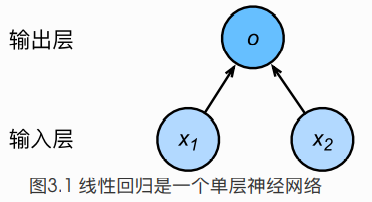



在图3.1所示的神经网络中，输入分别为 $x_1$ 和 $x_2$，因此输入层的输入个数为2。输入个数也叫特征数或特征向量维度。图3.1中网络的输出为 $o$，输出层的输出个数为1。需要注意的是，我们直接将图3.1中神经网络的输出 $o$ 作为线性回归的输出，即 $\hat{y} = o$。由于输入层并不涉及计算，按照惯例，图3.1所示的神经网络的层数为1。所以，线性回归是一个单层神经网络。输出层中负责计算 $o$ 的单元又叫神经元。在线性回归中，$o$ 的计算依赖于 $x_1$ 和 $x_2$。也就是说，输出层中的神经元和输入层中各个输入完全连接。因此，这里的输出层又叫全连接层（fully-connected layer）或稠密层（dense layer）。


#### 3.1.2.2 ⽮量计算表达式
在模型训练或预测时，我们常常会同时处理多个数据样本并⽤到⽮量计算。在介绍线性回归的⽮量计算
表达式之前，让我们先考虑对两个向量相加的两种⽅法

In [ ]:
a = torch.ones(1000)
b = torch.ones(1000)

# 法1： 将两个向量逐一做标量加法
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

# 法2： 两个向量直接做矢量加法
start = time()
d = a + b
print(time() - start)

# 可以从输出看出 矢量运算块

0.2853379249572754
0.010002374649047852


因此，我们应该尽可能采用矢量计算，以提升计算效率。

让我们再次回到本节的房价预测问题。如果我们对训练数据集里的3个房屋样本（索引分别为1、2和3）逐一预测价格，将得到
$$
\begin{aligned}
\hat{y}^{(1)} &= x_1^{(1)} w_1 + x_2^{(1)} w_2 + b,\\
\hat{y}^{(2)} &= x_1^{(2)} w_1 + x_2^{(2)} w_2 + b,\\
\hat{y}^{(3)} &= x_1^{(3)} w_1 + x_2^{(3)} w_2 + b.
\end{aligned}
$$

现在，我们将上面3个等式转化成矢量计算。设

$$
\boldsymbol{\hat{y}} =
\begin{bmatrix}
    \hat{y}^{(1)} \\
    \hat{y}^{(2)} \\
    \hat{y}^{(3)}
\end{bmatrix},\quad
\boldsymbol{X} =
\begin{bmatrix}
    x_1^{(1)} & x_2^{(1)} \\
    x_1^{(2)} & x_2^{(2)} \\
    x_1^{(3)} & x_2^{(3)}
\end{bmatrix},\quad
\boldsymbol{w} =
\begin{bmatrix}
    w_1 \\
    w_2
\end{bmatrix}
$$

对3个房屋样本预测价格的矢量计算表达式为$\boldsymbol{\hat{y}} = \boldsymbol{X} \boldsymbol{w} + b,$ 其中的加法运算使用了广播机制（参见2.2节）。例如：

In [197]:
a = torch.ones(3)
b = 10
print(a + b)

tensor([11., 11., 11.])


广义上讲，当数据样本数为 $n$，特征数为 $d$ 时，线性回归的矢量计算表达式为
$$
\boldsymbol{\hat{y}} = \boldsymbol{X} \boldsymbol{w} + b
$$
其中模型输出 $\boldsymbol{\hat{y}} \in \mathbb{R}^{n \times 1}$ 批量数据样本特征 $\boldsymbol{X} \in \mathbb{R}^{n \times d}$，权重 $\boldsymbol{w} \in \mathbb{R}^{d \times 1}$， 偏差 $b \in \mathbb{R}$。相应地，批量数据样本标签 $\boldsymbol{y} \in \mathbb{R}^{n \times 1}$。设模型参数 $\boldsymbol{\theta} = [w_1, w_2, b]^\top$，我们可以重写损失函数为
$$
\ell(\boldsymbol{\theta})=\frac{1}{2n}(\boldsymbol{\hat{y}}-\boldsymbol{y})^\top(\boldsymbol{\hat{y}}-\boldsymbol{y})
$$

小批量随机梯度下降的迭代步骤将相应地改写为
$$
\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}   \nabla_{\boldsymbol{\theta}} \ell^{(i)}(\boldsymbol{\theta}),
$$

其中梯度是损失有关3个为标量的模型参数的偏导数组成的向量：
$$
\nabla_{\boldsymbol{\theta}} \ell^{(i)}(\boldsymbol{\theta})=
\begin{bmatrix}
    \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_1} \\
    \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial w_2} \\
    \frac{ \partial \ell^{(i)}(w_1, w_2, b)  }{\partial b}
\end{bmatrix} =
\begin{bmatrix}
    x_1^{(i)} (x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}) \\
    x_2^{(i)} (x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}) \\
    x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}
\end{bmatrix}=
\begin{bmatrix}
    x_1^{(i)} \\
    x_2^{(i)} \\
    1
\end{bmatrix}
(\hat{y}^{(i)} - y^{(i)})
$$


### 小结

* 和大多数深度学习模型一样，对于线性回归这样一种单层神经网络，它的基本要素包括模型、训练数据、损失函数和优化算法。
* 既可以用神经网络图表示线性回归，又可以用矢量计算表示该模型。
* 应该尽可能采用矢量计算，以提升计算效率。

## 3.2 线性回归的从零开始实现


尽管强⼤的深度学习框架可以减少⼤
量重复性⼯作，但若过于依赖它提供的便利，会导致我们很难深⼊理解深度学习是如何⼯作的。因此，
本节将介绍如何只利⽤ Tensor 和 autograd 来实现⼀个线性回归的训练。

⾸先，导⼊本节中实验所需的包或模块，其中的matplotlib包可⽤于作图，且设置成嵌⼊显示。

In [198]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random


### 3.2.1 生成数据集

我们构造一个简单的人工训练数据集，它可以使我们能够直观比较学到的参数和真实的模型参数的区别。设训练数据集样本数为1000，输入个数（特征数）为2。给定随机生成的批量样本特征 $\boldsymbol{X} \in \mathbb{R}^{1000 \times 2}$，我们使用线性回归模型真实权重 $\boldsymbol{w} = [2, -3.4]^\top$ 和偏差 $b = 4.2$，以及一个随机噪声项 $\epsilon$ 来生成标签
$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{w} + b + \epsilon
$$

其中噪声项 $\epsilon$ 服从均值为0、标准差为0.01的正态分布。噪声代表了数据集中无意义的干扰。下面，让我们生成数据集。

In [ ]:
num_inputs= 2
num_examples = 1000
true_w = [2, -3.4]
true_b =4.2
features = torch.from_numpy(np.random.normal(0,1, (num_examples,num_inputs)))
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += torch.from_numpy(np.random.normal(0,0.01, size = labels.size()))

In [ ]:
features.size(),labels.size()

(torch.Size([1000, 2]), torch.Size([1000]))

通过⽣成第⼆个特征 features[:, 1] 和标签 labels 的散点图，可以更直观地观察两者间的线性关
系。

In [ ]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

<ipython-input-250-fec818237674>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


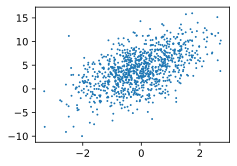

In [ ]:
def set_figsize(figsize = (3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
# 最后一个参数1表示散点的大小
plt.scatter(features[:,0].numpy(),labels.numpy(),1)

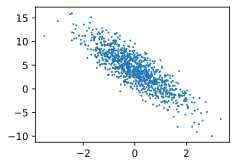

In [ ]:
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

我们将上⾯的 plt 作 图 函 数 以 及 use_svg_display 函 数 和 set_figsize 函 数 定 义
在 d2lzh_pytorch 包 ⾥ 。 以 后 在 作 图 时 ， 我 们 将 直 接 调 ⽤ d2lzh_pytorch.plt 。 由 于 plt
在 d2lzh_pytorch 包 中 是 ⼀ 个 全 局 变 量 ， 我 们 在 作 图 前 只 需 要 调
⽤ d2lzh_pytorch.set_figsize() 即可打印⽮量图并设置图的尺⼨

### 3.2.2 读取数据


在训练模型的时候，我们需要遍历数据集并不断读取⼩批量数据样本。这⾥我们定义⼀个函数：它每次
返回 batch_size （批量⼤⼩）个随机样本的特征和标签。

In [ ]:
 # 本函数已保存在d2lzh包中⽅便以后使⽤
def data_iter(batch_size, features,labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 索引
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        # 最后一次可能不足batch_size个
        j = torch.LongTensor(indices[i:min(i + batch_size, num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)

 让我们读取第⼀个⼩批量数据样本并打印。每个批量的特征形状为(10, 2)，分别对应批量⼤⼩和输⼊个
数；标签形状为批量⼤⼩。

In [ ]:
batch_size = 10
for x,y in data_iter(batch_size,features,labels):
    print(x,y)
    break
# 因为是yield迭代器，如果不加break就一直打印直到用尽

NameError: name 'random' is not defined

 
### 3.2.3 初始化模型参数

我们将权重初始化成均值为0、标准差为0.01的正态随机数，偏差则初始化成0。

In [ ]:
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)))
b = torch.zeros(1)

之后的模型训练中，需要对这些参数求梯度来迭代参数的值，因此我们要让它们的
requires_grad=True

In [ ]:
w.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)

tensor([0.], requires_grad=True)

### 3.2.4 定义模型

In [ ]:
# 即定义运算表达式，使用torch.mm做矩阵乘法
def linreg(X,w,b):
    return torch.mm(X,w) + b

### 3.2.5定义损失函数

In [ ]:
# 把真实值y便形成预测值y_hat的形状
# 以下函数返回的结果也将和 y_hat 的形状相同。

def squared_loss(y_hat,y):
    # Note:这里返回的是向量
    # pytorch中的MSELoss并没有除以2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2.0

### 3.2.6 定义优化算法
以下的 sgd 函数实现了上⼀节中介绍的⼩批量随机梯度下降算法。它通过不断迭代模型参数来优化损失
函数。这⾥⾃动求梯度模块计算得来的梯度是⼀个批量样本的梯度和.我们将它除以批量⼤⼩来得到平
均值

In [ ]:
def sgd(params, lr, batch_size):
    for param in params:
        # 注意这里改的是param.data
        param.data -= lr * param.grad / batch_size

### 3.2.7 训练模型
在训练中，我们将多次迭代模型参数。在每次迭代中，我们根据当前读取的⼩批量数据样本（特征 X 和
标签 y ），通过调⽤反向函数 backward 计算⼩批量随机梯度，并调⽤优化算法 sgd 迭代模型参数。
由于我们之前设批量⼤⼩ batch_size 为10，每个⼩批量的损失 l 的形状为(10, 1)。回忆⼀下⾃动求
梯度⼀节。由于变量 l 并不是⼀个标量，所以我们可以调⽤ .sum() 将其求和得到⼀个标量，再运
⾏ l.backward() 得到该变量有关模型参数的梯度。注意在每次更新完参数后不要忘了将参数的梯度清
零。

在⼀个迭代周期（epoch）中，我们将完整遍历⼀遍 data_iter 函数，并对训练数据集中所有样本都
使⽤⼀次（假设样本数能够被批量⼤⼩整除）。这⾥的迭代周期个数 num_epochs 和学习率 lr 都是超
参数，分别设3和0.03。在实践中，⼤多超参数都需要通过反复试错来不断调节。虽然迭代周期数设得
越⼤模型可能越有效，但是训练时间可能过⻓。⽽有关学习率对模型的影响，我们会在后⾯“优化算
法”⼀章中详细介绍

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    # X,y分别为小批量的特征和标签
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)

        # 梯度归0
        w.grad.data.zero_()
        b.grad.data.zero_()
    # 打印每个回合的损失
    train_l  = loss(net(features,w,b),labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.000183
epoch 2, loss 0.000053
epoch 3, loss 0.000053


In [ ]:
# 比较真实参数和拟合出的参数
true_w,w

([2, -3.4],
 tensor([[ 1.9994],
         [-3.3997]], dtype=torch.float64, requires_grad=True))

In [ ]:
true_b,b

(4.2, tensor([4.2002], requires_grad=True))

## 3.3线性回归的简洁实现

In [ ]:
### 生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.
features = torch.tensor(np.random.normal(0,1,(num_examples,num_inputs)), dtype = torch.float)
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += torch.tensor(np.random.normal(0,0.01,size = labels.size()),dtype = torch.float)


In [ ]:
# 读取数据
# pytorch 提供data来读数据
import torch.utils.data as Data

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
data_iter  = Data.DataLoader(dataset, batch_size = 10, shuffle = True)

nn 的核⼼数据结构是 Module ，它是⼀个抽象概念，既可以表示神经⽹络中的某个层（layer），
也可以表示⼀个包含很多层的神经⽹络。在实际使⽤中，最常⻅的做法是继承 nn.Module ，撰写⾃⼰
的⽹络/层。⼀个 nn.Module 实例应该包含⼀些层以及返回输出的前向传播（forward）⽅法

In [ ]:
# 定义模型
import torch.nn as nn
class LinearNet(nn.Module):
    def __init__(self,n_feature):
        super(LinearNet,self).__init__()
        # n个特征到一个输出的层
        self.linear = nn.Linear(n_feature,1)
        
    def forward(self,x):
        y = self,linear(x)
        return y
    
net = LinearNet(num_inputs)
# 打印出网络的结构
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


事实上我们还可以⽤ nn.Sequential 来更加⽅便地搭建⽹络， Sequential 是⼀个有序的容器，⽹络
层将按照在传⼊ Sequential 的顺序依次被添加到计算图中

In [ ]:
# 法1：
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处还可以出入其它层
)

# 法2：
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs,1))
# net.add_module 。。。

# 法3：
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
    ('linear', nn.Linear(num_inputs,1))
    # ...
]))

print(net)
print(net[0])


Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


In [ ]:
# 可以通过 net.parameters() 来查看模型所有的可学习参数，此函数将返回⼀个⽣成器
for param in net.parameters():
    print(param)
    
net.parameters()

Parameter containing:
tensor([[ 0.5803, -0.4551]], requires_grad=True)
Parameter containing:
tensor([-0.3203], requires_grad=True)


<generator object Module.parameters at 0x000001A8DD52B350>

In [ ]:
# 作为⼀个单层神经⽹络，线性回归输出层中的神经元和输⼊层中各个输⼊完全连接。因此，线性回归的输出层⼜叫全连接层。

注意： torch.nn 仅⽀持输⼊⼀个batch的样本不⽀持单个样本输⼊，如果只有单个样本，可使
⽤ input.unsqueeze(0) 来添加⼀维

In [ ]:
# 初始化模型参数
# PyTorch在 init 模块中 提供了多种参数初始化⽅法
from torch.nn import init
# 通过 init.normal_ 将权重参数每个元素初始化为随机采样于均值为0、标准差为0.01的正态分布。偏差会初始化为零。
init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)
# 也可以直接修改bias的data
# net[0].bias.fill_(0)

net[0].weight,net[0].bias

(Parameter containing:
 tensor([[0.0130, 0.0018]], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True))

PyTorch在 nn 模块中提供了各种损失函数，这些损失函数可看作是⼀种特殊的层，PyTorch也将这些损
失函数实现为 nn.Module 的⼦类。我们现在使⽤它提供的均⽅误差损失作为模型的损失函数。

In [ ]:
# 定义损失函数# 
loss = nn.MSELoss()

我们也⽆须⾃⼰实现⼩批量随机梯度下降算法。 torch.optim 模块提供了很多常⽤的优化算法
⽐如SGD、Adam和RMSProp等。

In [ ]:
# 定义优化函数
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr = 0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


我们还可以为不同**⼦⽹络**设置不同的学习率，这在finetune时经常⽤到

```python
optimizer = optim.SGD([
    # 如果对某个参数不指定，则使用最外层的默认学习率
    {'params': net.subnet1.parameters()}, # lr = 0.03
    {'params': net.subnet2.parameters(), 'lr': 0.01}
],lr = 0.03)
```

有时候我们不想让学习率固定成⼀个常数，那如何调整学习率呢？主要有两种做法。

⼀种是修改 optimizer.param_groups 中对应的学习率，

另⼀种是更简单也是较为推荐的做法——新建优化器，由于optimizer⼗分轻量级，构建开销很⼩，故⽽可以构建新的optimizer。但是后者对于使⽤动量的优化器（如Adam），会丢失动量等状态信息，可能会造成损失函数的收敛出现震荡等情况。

In [ ]:
optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[0.0130, 0.0018]], requires_grad=True),
   Parameter containing:
   tensor([0.], requires_grad=True)],
  'lr': 0.03,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False}]

In [ ]:
for param_group in optimizer.param_groups:
    param_group['lr'] *= 0.1

optimizer.param_groups

[{'params': [Parameter containing:
   tensor([[0.0130, 0.0018]], requires_grad=True),
   Parameter containing:
   tensor([0.], requires_grad=True)],
  'lr': 0.003,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False}]

In [ ]:
# 训练模型
# 通过调⽤ optim 实例的 step 函数来迭代模型参数。按照⼩批量随机梯度下降的定义，我们在 step 函数中指明批量⼤⼩，从⽽对批量中样本梯度求平均

num_epochs = 3
for epoch in range(1, num_epochs +1):
    for X,y in data_iter:
        # 求拟合值
        output = net(X)
        # 求loss
        l = loss(output, y.view(-1,1))
        # 梯度归零
        optimizer.zero_grad()# 等价于net.zero_grad()
        # 求梯度
        l.backward()
        # 根据梯度，更新参数
        optimizer.step() 
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.000036
epoch 2, loss: 0.000170
epoch 3, loss: 0.000100


In [ ]:
# 比较模型参数和真实参数
(true_w,net[0].weight.data),(true_b,net[0].bias.data)

(([2, -3.4], tensor([[ 2.0002, -3.4003]])), (4.0, tensor([4.0003])))

### ⼩结
torch.utils.data 模块提供了有关数据处理的⼯具， 
torch.nn 模块定义了⼤量神经⽹络的层， 
torch.nn.init 模块定义了各种初始化⽅法， 
torch.optim 模块提供了模型参数初始化的各种⽅法。

## 3.4 SOFTMAX回归

前⼏节介绍的线性回归模型适⽤于输出为连续值的情景。在另⼀类情景中，模型输出可以是⼀个像图像
类别这样的离散值。对于这样的离散值预测问题，我们可以使⽤诸如softmax回归在内的分类模型。和
线性回归不同，softmax回归的输出单元从⼀个变成了多个，且引⼊了softmax运算使输出更适合离散
值的预测和训练。本节以softmax回归模型为例，介绍神经⽹络中的分类模型

### 3.4.1 分类问题
让我们考虑⼀个简单的图像分类问题，其输⼊图像的⾼和宽均为2像素，且⾊彩为灰度。这样每个像素
值都可以⽤⼀个标量表示。我们将图像中的4像素分别记为x1,x2,x3,x4 。假设训练数据集中图像的真
实标签为狗、猫或鸡（假设可以⽤4像素表示出这3种动物），这些标签分别对应离散值 。
我们通常使⽤离散的数值来表示类别，例如y1 = 1,y2=2,y3=3 。如此，⼀张图像的标签为1、2和 3这3个数值中的⼀个。虽然我们仍然可以使⽤回归模型来进⾏建模，并将预测值就近定点化到1、2和3 这3个离散值之⼀，但这种连续值到离散值的转化通常会影响到分类质量。因此我们⼀般使⽤更加适合
离散值输出的模型来解决分类问题。

### 3.4.2 softmax回归模型

softmax回归跟线性回归一样将输入特征与权重做线性叠加。与线性回归的一个主要不同在于，softmax回归的输出值个数等于标签里的类别数。因为一共有4种特征和3种输出动物类别，所以权重包含12个标量（带下标的$w$）、偏差包含3个标量（带下标的$b$），且对每个输入计算$o_1, o_2, o_3$这3个输出：

$$
\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{21} + x_3 w_{31} + x_4 w_{41} + b_1,\\
o_2 &= x_1 w_{12} + x_2 w_{22} + x_3 w_{32} + x_4 w_{42} + b_2,\\
o_3 &= x_1 w_{13} + x_2 w_{23} + x_3 w_{33} + x_4 w_{43} + b_3.
\end{aligned}
$$


图3.2用神经网络图描绘了上面的计算。softmax回归同线性回归一样，也是一个单层神经网络。由于每个输出$o_1, o_2, o_3$的计算都要依赖于所有的输入$x_1, x_2, x_3, x_4$，softmax回归的输出层也是一个全连接层。

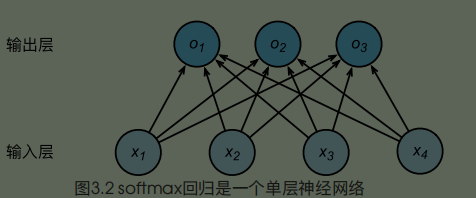 


既然分类问题需要得到离散的预测输出，一个简单的办法是将输出值$o_i$当作预测类别是$i$的置信度，并将值最大的输出所对应的类作为预测输出，即输出 $\underset{i}{\arg\max} o_i$。例如，如果$o_1,o_2,o_3$分别为$0.1,10,0.1$，由于$o_2$最大，那么预测类别为2，其代表猫。

然而，直接使用输出层的输出有两个问题。一方面，由于输出层的输出值的范围不确定，我们难以直观上判断这些值的意义。例如，刚才举的例子中的输出值10表示“很置信”图像类别为猫，因为该输出值是其他两类的输出值的100倍。但如果$o_1=o_3=10^3$，那么输出值10却又表示图像类别为猫的概率很低。另一方面，由于真实标签是离散值，这些离散值与不确定范围的输出值之间的误差难以衡量。

softmax运算符（softmax operator）解决了以上两个问题。它通过下式将输出值变换成值为正且和为1的概率分布：

$$
\hat{y}_1, \hat{y}_2, \hat{y}_3 = \text{softmax}(o_1, o_2, o_3)
$$

其中

$$
\hat{y}_1 = \frac{ \exp(o_1)}{\sum_{i=1}^3 \exp(o_i)},\quad
\hat{y}_2 = \frac{ \exp(o_2)}{\sum_{i=1}^3 \exp(o_i)},\quad
\hat{y}_3 = \frac{ \exp(o_3)}{\sum_{i=1}^3 \exp(o_i)}.
$$

容易看出$\hat{y}_1 + \hat{y}_2 + \hat{y}_3 = 1$且$0 \leq \hat{y}_1, \hat{y}_2, \hat{y}_3 \leq 1$，因此$\hat{y}_1, \hat{y}_2, \hat{y}_3$是一个合法的概率分布。这时候，如果$\hat{y}_2=0.8$，不管$\hat{y}_1$和$\hat{y}_3$的值是多少，我们都知道图像类别为猫的概率是80%。此外，我们注意到

$$
\underset{i}{\arg\max} o_i = \underset{i}{\arg\max} \hat{y}_i
$$

因此softmax运算不改变预测类别输出。

### 3.4.3 单样本分类的矢量计算表达式

为了提高计算效率，我们可以将单样本分类通过矢量计算来表达。在上面的图像分类问题中，假设softmax回归的权重和偏差参数分别为

$$
\boldsymbol{W} = 
\begin{bmatrix}
    w_{11} & w_{12} & w_{13} \\
    w_{21} & w_{22} & w_{23} \\
    w_{31} & w_{32} & w_{33} \\
    w_{41} & w_{42} & w_{43}
\end{bmatrix},\quad
\boldsymbol{b} = 
\begin{bmatrix}
    b_1 & b_2 & b_3
\end{bmatrix},
$$

设高和宽分别为2个像素的图像样本$i$的特征为

$$\boldsymbol{x}^{(i)} = \begin{bmatrix}x_1^{(i)} & x_2^{(i)} & x_3^{(i)} & x_4^{(i)}\end{bmatrix},$$

输出层的输出为

$$\boldsymbol{o}^{(i)} = \begin{bmatrix}o_1^{(i)} & o_2^{(i)} & o_3^{(i)}\end{bmatrix},$$

预测为狗、猫或鸡的概率分布为

$$\boldsymbol{\hat{y}}^{(i)} = \begin{bmatrix}\hat{y}_1^{(i)} & \hat{y}_2^{(i)} & \hat{y}_3^{(i)}\end{bmatrix}.$$


softmax回归对样本$i$分类的矢量计算表达式为

$$
\begin{aligned}
\boldsymbol{o}^{(i)} &= \boldsymbol{x}^{(i)} \boldsymbol{W} + \boldsymbol{b},\\
\boldsymbol{\hat{y}}^{(i)} &= \text{softmax}(\boldsymbol{o}^{(i)}).
\end{aligned}
$$

### 3.4.4 小批量样本分类的矢量计算表达式


为了进一步提升计算效率，我们通常对小批量数据做矢量计算。广义上讲，给定一个小批量样本，其批量大小为$n$，输入个数（特征数）为$d$，输出个数（类别数）为$q$。设批量特征为$\boldsymbol{X} \in \mathbb{R}^{n \times d}$。假设softmax回归的权重和偏差参数分别为$\boldsymbol{W} \in \mathbb{R}^{d \times q}$和$\boldsymbol{b} \in \mathbb{R}^{1 \times q}$。softmax回归的矢量计算表达式为

$$
\begin{aligned}
\boldsymbol{O} &= \boldsymbol{X} \boldsymbol{W} + \boldsymbol{b},\\
\boldsymbol{\hat{Y}} &= \text{softmax}(\boldsymbol{O}),
\end{aligned}
$$

其中的加法运算使用了广播机制，$\boldsymbol{O}, \boldsymbol{\hat{Y}} \in \mathbb{R}^{n \times q}$且这两个矩阵的第$i$行分别为样本$i$的输出$\boldsymbol{o}^{(i)}$和概率分布$\boldsymbol{\hat{y}}^{(i)}$。

### 3.4.5 交叉熵损失函数

前面提到，使用softmax运算后可以更方便地与离散标签计算误差。我们已经知道，softmax运算将输出变换成一个合法的类别预测分布。实际上，真实标签也可以用类别分布表达：对于样本$i$，我们构造向量$\boldsymbol{y}^{(i)}\in \mathbb{R}^{q}$ ，使其第$y^{(i)}$（样本$i$类别的离散数值）个元素为1，其余为0。这样我们的训练目标可以设为使预测概率分布$\boldsymbol{\hat y}^{(i)}$尽可能接近真实的标签概率分布$\boldsymbol{y}^{(i)}$。

我们可以像线性回归那样使用平方损失函数$\|\boldsymbol{\hat y}^{(i)}-\boldsymbol{y}^{(i)}\|^2/2$。然而，想要预测分类结果正确，我们其实并不需要预测概率完全等于标签概率。例如，在图像分类的例子里，如果$y^{(i)}=3$，那么我们只需要$\hat{y}^{(i)}_3$比其他两个预测值$\hat{y}^{(i)}_1$和$\hat{y}^{(i)}_2$大就行了。即使$\hat{y}^{(i)}_3$值为0.6，不管其他两个预测值为多少，类别预测均正确。而平方损失则过于严格，例如$\hat y^{(i)}_1=\hat y^{(i)}_2=0.2$比$\hat y^{(i)}_1=0, \hat y^{(i)}_2=0.4$的损失要小很多，虽然两者都有同样正确的分类预测结果。

改善上述问题的一个方法是使用更适合衡量两个概率分布差异的测量函数。其中，交叉熵（cross entropy）是一个常用的衡量方法：

$$H\left(\boldsymbol y^{(i)}, \boldsymbol {\hat y}^{(i)}\right ) = -\sum_{j=1}^q y_j^{(i)} \log \hat y_j^{(i)},$$

其中带下标的$y_j^{(i)}$是向量$\boldsymbol y^{(i)}$中非0即1的元素，需要注意将它与样本$i$类别的离散数值，即不带下标的$y^{(i)}$区分。在上式中，我们知道向量$\boldsymbol y^{(i)}$中只有第$y^{(i)}$个元素$y^{(i)}_{y^{(i)}}$为1，其余全为0，于是$H(\boldsymbol y^{(i)}, \boldsymbol {\hat y}^{(i)}) = -\log \hat y_{y^{(i)}}^{(i)}$。也就是说，交叉熵只关心对正确类别的预测概率，因为只要其值足够大，就可以确保分类结果正确。当然，遇到一个样本有多个标签时，例如图像里含有不止一个物体时，我们并不能做这一步简化。但即便对于这种情况，交叉熵同样只关心对图像中出现的物体类别的预测概率。


假设训练数据集的样本数为$n$，交叉熵损失函数定义为
$$\ell(\boldsymbol{\Theta}) = \frac{1}{n} \sum_{i=1}^n H\left(\boldsymbol y^{(i)}, \boldsymbol {\hat y}^{(i)}\right ),$$

其中$\boldsymbol{\Theta}$代表模型参数。同样地，如果每个样本只有一个标签，那么交叉熵损失可以简写成$\ell(\boldsymbol{\Theta}) = -(1/n)  \sum_{i=1}^n \log \hat y_{y^{(i)}}^{(i)}$。从另一个角度来看，我们知道最小化$\ell(\boldsymbol{\Theta})$等价于最大化$\exp(-n\ell(\boldsymbol{\Theta}))=\prod_{i=1}^n \hat y_{y^{(i)}}^{(i)}$，即最小化交叉熵损失函数等价于最大化训练数据集所有标签类别的联合预测概率。


### 3.4.6 模型预测及评价

在训练好softmax回归模型后，给定任一样本特征，就可以预测每个输出类别的概率。通常，我们把预测概率最大的类别作为输出类别。

使用准确率（accuracy）来评价模型的表现。它等于正确预测数量与总预测数量之比。

### 小结

* softmax回归适用于分类问题。它使用softmax运算输出类别的概率分布。
* softmax回归是一个单层神经网络，输出个数等于分类问题中的类别个数。
* 交叉熵适合衡量两个概率分布的差异。


## 3.5 图像分类数据集（Fashion-MNIST）



在介绍softmax回归的实现前我们先引入一个多类图像分类数据集。

图像分类数据集中最常用的是手写数字识别数据集MNIST[1]
我们将使用一个图像内容更加复杂的数据集Fashion-MNIST[2]（这个数据集也比较小，只有几十M，没有GPU的电脑也能吃得消）。

本节我们将使用torchvision包，它是服务于PyTorch深度学习框架的，主要用来构建计算机视觉模型。torchvision主要由以下几部分构成：
1. `torchvision.datasets`: 一些加载数据的函数及常用的数据集接口；
2. `torchvision.models`: 包含常用的模型结构（含预训练模型），例如AlexNet、VGG、ResNet等；
3. `torchvision.transforms`: 常用的图片变换，例如裁剪、旋转等；
4. `torchvision.utils`: 其他的一些有用的方法。

### 3.5.1 获取数据集

首先导入本节需要的包或模块。

In [ ]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys
import d2lzh as d2l

下面，我们通过torchvision的`torchvision.datasets`来下载这个数据集。第一次调用时会自动从网上获取数据。我们通过参数`train`来指定获取训练数据集或测试数据集（testing data set）。

另外我们还指定了参数`transform = transforms.ToTensor()`使所有数据转换为`Tensor`，如果不进行转换则返回的是PIL图片。`transforms.ToTensor()`将尺寸为 (H x W x C) 且数据位于[0, 255]的PIL图片或者数据类型为`np.uint8`的NumPy数组转换为尺寸为(C x H x W)且数据类型为`torch.float32`且位于[0.0, 1.0]的`Tensor`。

> 注意： 由于像素值为0到255的整数，所以刚好是uint8所能表示的范围，包括`transforms.ToTensor()`在内的一些关于图片的函数就默认输入的是uint8型，若不是，可能不会报错但可能得不到想要的结果。所以，**如果用像素值(0-255整数)表示图片数据，那么一律将其类型设置成uint8，避免不必要的bug。** 本人就被这点坑过，详见[我的这个博客2.2.4节](https://tangshusen.me/2018/12/05/kaggle-doodle-reco/)。

In [ ]:
mnist_train = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST',
train=True, download=True, transform=transforms.ToTensor())
mnist_test =torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST',
train=False, download=True, transform=transforms.ToTensor())

上⾯的 mnist_train 和 mnist_test 都是 torch.utils.data.Dataset 的⼦类，所以我们可以
⽤ len() 来获取该数据集的⼤⼩，还可以⽤下标来获取具体的⼀个样本。训练集中和测试集中的每个
类别的图像数分别为6,000和1,000。因为有10个类别，所以训练集和测试集的样本数分别为60,000和
10,000。

In [ ]:
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [ ]:
# 可以通过下标来访问任意⼀个样本
feature, label = mnist_train[0]
print(feature.shape, label) # Channel x Height X Width

torch.Size([1, 28, 28]) 9


变量`feature`对应高和宽均为28像素的图像。由于我们使用了`transforms.ToTensor()`，所以每个像素的数值为[0.0, 1.0]的32位浮点数。需要注意的是，`feature`的尺寸是 (C x H x W) 的，而不是 (H x W x C)。第一维是通道数，因为数据集中是灰度图像，所以通道数为1。后面两维分别是图像的高和宽。


Fashion-MNIST中一共包括了10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。

In [ ]:
# 将数值标签转成相应的文本标签。
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress','coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle','boot']
    return [text_labels[int(i)] for i in labels ]

In [ ]:
# 在⼀⾏⾥画出多张图像和对应标签的函数

def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    # _表示忽略不用的变量
    _,figs = plt.subplots(1, len(images), figsize = (12,12))
    for f,img,lbl in zip(figs,images,labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

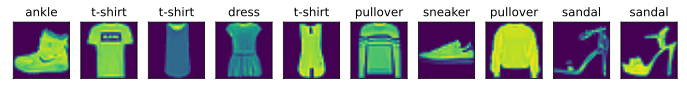

In [ ]:
# 前世train，后是test
X,y = [],[]
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])    

show_fashion_mnist(X, get_fashion_mnist_labels(y))

### 3.5.2 读取⼩批量

前⾯说
过 ， mnist_train 是 torch.utils.data.Dataset 的 ⼦ 类 ， 所 以 我 们 可 以 将 其 传
⼊ torch.utils.data.DataLoader 来创建⼀个读取⼩批量数据样本的DataLoader实例。
在实践中，数据读取经常是训练的性能瓶颈，特别当模型较简单或者计算硬件性能较⾼时。PyTorch的
DataLoader 中 ⼀ 个 很 ⽅ 便 的 功 能 是 允 许 使 ⽤ 多 进 程 来 加 速 数 据 读 取 。 这 ⾥ 我 们 通 过 参
数 num_workers 来设置4个进程读取数据

In [ ]:
batch_size = 256

if sys.platform.startswith('win'):
    num_workers = 0 # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4

train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=False,num_workers=num_workers)

我们将获取并读取Fashion-MNIST数据集的逻辑封装在 d2lzh_pytorch.load_data_fashion_mnist
函数中供后⾯章节调⽤。该函数将返回 train_iter 和 test_iter 两个变量。随着本书内容的不断深
⼊，我们会进⼀步改进该函数。它的完整实现将在5.6节中描述

In [47]:
# 最后我们查看读取⼀遍训练数据需要的时间
start = time.time()
for X,y in train_iter:
    continue
print("%.2f sec" % (time.time() - start))

7.60 sec


### ⼩结

Fashion-MNIST是⼀个10类服饰分类数据集，之后章节⾥将使⽤它来检验不同算法的表现

## 3.6 SOFTMAX回归的从零开始实现

### 3.6.1 获取和读取数据

In [7]:
batch_size = 256
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size)

26422272it [01:28, 299247.49it/s]                              


Extracting C:\Users\admin/Datasets/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\admin/Datasets/FashionMNIST\FashionMNIST\raw



29696it [00:00, 97010.46it/s]                           


Extracting C:\Users\admin/Datasets/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\admin/Datasets/FashionMNIST\FashionMNIST\raw



4422656it [00:12, 363293.52it/s]                             


Extracting C:\Users\admin/Datasets/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\admin/Datasets/FashionMNIST\FashionMNIST\raw



6144it [00:00, 3076991.50it/s]          


Extracting C:\Users\admin/Datasets/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\admin/Datasets/FashionMNIST\FashionMNIST\raw

Processing...


D:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


### 3.6.2 初始化模型参数


跟线性回归中的例⼦⼀样，我们将使⽤向量表示每个样本。已知每个样本输⼊是⾼和宽均为28像素的图
像。模型的输⼊向量的⻓度是28*28=784 ：该向量的每个元素对应图像中每个像素。由于图像有
10个类别，单层神经⽹络输出层的输出个数为10，因此softmax回归的权重和偏差参数分别为784*10
和 1*10（即10个）的矩阵。

In [8]:
num_inputs = 784
num_outputs = 10

W = torch.tensor(np.random.normal(0, 0.01, (num_inputs,num_outputs)), dtype=torch.float) 
b = torch.zeros(num_outputs, dtype=torch.float)

In [9]:
# 同之前⼀样，我们需要模型参数梯度

W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

### 3.6.3 实现SOFTMAX运算

In [10]:
# 如何对多维Tensor 按维度操作

X = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(X.sum(dim=0, keepdim=True))
print(X.sum(dim=1, keepdim=True))

tensor([[5, 7, 9]])
tensor([[ 6],
        [15]])


In [11]:
# 定义softmax运算
# 矩阵X的行数是样本数，列数是输出个数
# 先exp,在对本行求和，在该行每个元素除以和
# 。softmax运算的输出矩阵中的任意⼀⾏元素代表了⼀个样本在各个输出类别上的预测概率。

def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim = 1, keepdim = True)
    return X_exp / partition # 对 partition应⽤了⼴播机制

X = torch.tensor([[1, 2, 3], [4, 5, 6]])
X_prob = softmax(X)
print(X_prob)
print(X_prob.sum(dim = 1))

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])
tensor([1., 1.])


### 3.6.4 定义模型

In [12]:
def net(X):
    return softmax(torch.mm(X.view((-1,num_inputs)), W) +b)

### 3.6.5 定义损失函数

为了得到标签的预测概率，我们可以使
⽤ gather 函数.在下⾯的例⼦中，变量 y_hat 是2个样本在3个类别的预测概率，变量 y 是这2个样本
的标签类别。通过使⽤ gather 函数，我们得到了2个样本的标签的预测概率。

In [17]:
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = torch.LongTensor([0, 2])
y_hat.gather(1, y.view(-1,1))

tensor([[0.1000],
        [0.5000]])

In [14]:
# 交叉熵损失函数

def cross_entropy(y_hat,y):
    return -torch.log(y_hat.gather(1, y.view(-1,1)))

### 计算分类准确率

给定⼀个类别的预测概率分布 y_hat ，我们把预测概率最⼤的类别作为输出类别。如果它与真实类
别 y ⼀致，说明这次预测是正确的。分类准确率即正确预测数量与总预测数量之⽐。
为了演示准确率的计算，下⾯定义准确率 accuracy 函数。其中 y_hat.argmax(dim=1) 返回矩
阵 y_hat 每 ⾏ 中 最 ⼤ 元 素 的 索 引 ， 且 返 回 结 果 与 变 量 y 形 状 相 同。
相 等 条 件 判 断
式 (y_hat.argmax(dim=1) == y) 是⼀个类型为 ByteTensor 的 Tensor ，我们⽤ float() 将其转
换为值为0（相等为假）或1（相等为真）的浮点型 Tensor 。

In [15]:
def accuracy(y_hat,y):
    return (y_hat.argmax(dim = 1) == y).float().mean().item()

In [26]:
# 评论模型net在数据集data_iter上的准确率(由上面改写而来)

def evaluate_accuracy(data_iter,net):
    acc_sum, n = 0.0,0
    for X,y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]

        return acc_sum /n

### 3.6.7 训练模型

In [32]:
num_epochs = 5
lr = 0.1

def train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum = 0.0
        train_acc_sum = 0.0
        n =0

        for X,y in train_iter:
            y_hat = net(X) # y_hat是答案
            l = loss(y_hat,y).sum()

            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()

            l.backward()
            if optimizer is None:
                d2l.sgd(params,lr,batch_size)
            else:
                optimizer.step() 

            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == True).sum().item()
            n += y.shape[0]

        test_acc = evaluate_accuracy(test_iter,net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f' % (epoch + 1, train_l_sum / n, train_acc_sum / n,
test_acc))


In [34]:
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs,
batch_size, [W, b], lr)

epoch 1, loss 0.5104, train acc 0.098, test acc 0.836
epoch 2, loss 0.4929, train acc 0.098, test acc 0.848
epoch 3, loss 0.4792, train acc 0.098, test acc 0.840
epoch 4, loss 0.4690, train acc 0.098, test acc 0.836
epoch 5, loss 0.4608, train acc 0.098, test acc 0.848


### 3.6.8预测

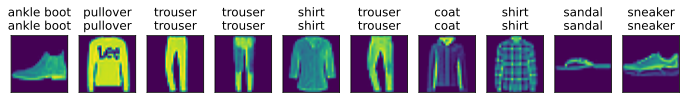

In [43]:
X,y = iter(test_iter).next()

true_labels = d2l.get_fashion_mnist_labels(y.numpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true,pred in zip(true_labels,pred_labels)]

d2l.show_fashion_mnist(X[0:10],titles[0:10])

###  3.7 SOFTMAX回归的简洁实现

In [45]:
# 读取数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 初始化模型
# ，softmax回归的输出层是⼀个全连接层，所以我们⽤⼀个线性模块就可以了
num_inputs = 784
num_outputs = 10

class LinearNet(nn.Module):
    def __init__(self,num_inputs,num_outputs):
        super(LinearNet,self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
    def forward(self,x): #x shape:(batch_size,1,28,28)
        # 使用view()把x形状变成（batch_size,784)再送入全连接层
        y = self.linear(x.view(x.shape[0], -1))
        return y

net = LinearNet(num_inputs, num_outputs)

In [46]:
# 将对 x 的形状转换的这个功能⾃定义⼀个 FlattenLayer 并记录在 d2lzh_pytorch 中⽅便后⾯使⽤
# 本函数已保存在d2lzh_pytorch包中⽅便以后使⽤
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x): # x shape: (batch, *, *, ...)
        return x.view(x.shape[0], -1)

In [50]:
# (重新) 定义模型

net = nn.Sequential(
    # FlatterLayer(),
    # nn.Linear(num_inputs,num_outputs)
    OrderedDict([
        ('flatten', FlattenLayer()),
        ('linear', nn.Linear(num_inputs,num_outputs))
    ])
)

# 初始化权重参数
init.normal_(net.linear.weight, mean=0,std=0.01)
init.constant_(net.linear.bias,val = 0)

# 损失函数
loss = nn.CrossEntropyLoss()

# 优化算法
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

num_epochs = 3

# 训练
def train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum = 0.0
        train_acc_sum = 0.0
        n =0

        for X,y in train_iter:
            y_hat = net(X) # y_hat是答案
            l = loss(y_hat,y).sum()

            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()

            l.backward()
            if optimizer is None:
                d2l.sgd(params,lr,batch_size)
            else:
                optimizer.step() 

            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == True).sum().item()
            n += y.shape[0]

        test_acc = evaluate_accuracy(test_iter,net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f' % (epoch + 1, train_l_sum / n, train_acc_sum / n,
test_acc))

train_ch3(net, train_iter, test_iter, loss, num_epochs,
batch_size, None, None,optimizer)

epoch 1, loss 0.0031, train acc 0.096, test acc 0.770
epoch 2, loss 0.0022, train acc 0.097, test acc 0.816
epoch 3, loss 0.0021, train acc 0.098, test acc 0.824


## 3.8多层感知机(multilayer perception,MLP)

### 3.8.1隐藏层

多层感知机在单层神经⽹络的基础上引⼊了⼀到多个隐藏层（hidden layer）。隐藏层位于输⼊层和输
出层之间。图3.3展示了⼀个多层感知机的神经⽹络图，它含有⼀个隐藏层，该层中有5个隐藏单元。

在图3.3所示的多层感知机中，输入和输出个数分别为4和3，中间的隐藏层中包含了5个隐藏单元（hidden unit）。由于输入层不涉及计算，图3.3中的多层感知机的层数为2。由图3.3可见，隐藏层中的神经元和输入层中各个输入完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。


具体来说，给定一个小批量样本$\boldsymbol{X} \in \mathbb{R}^{n \times d}$，其批量大小为$n$，输入个数为$d$。假设多层感知机只有一个隐藏层，其中隐藏单元个数为$h$。记隐藏层的输出（也称为隐藏层变量或隐藏变量）为$\boldsymbol{H}$，有$\boldsymbol{H} \in \mathbb{R}^{n \times h}$。因为隐藏层和输出层均是全连接层，可以设隐藏层的权重参数和偏差参数分别为$\boldsymbol{W}_h \in \mathbb{R}^{d \times h}$和 $\boldsymbol{b}_h \in \mathbb{R}^{1 \times h}$，输出层的权重和偏差参数分别为$\boldsymbol{W}_o \in \mathbb{R}^{h \times q}$和$\boldsymbol{b}_o \in \mathbb{R}^{1 \times q}$。

我们先来看一种含单隐藏层的多层感知机的设计。其输出$\boldsymbol{O} \in \mathbb{R}^{n \times q}$的计算为

$$
\begin{aligned}
\boldsymbol{H} &= \boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h,\\
\boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
\end{aligned}      
$$

也就是将隐藏层的输出直接作为输出层的输入。如果将以上两个式子联立起来，可以得到

$$
\boldsymbol{O} = (\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h)\boldsymbol{W}_o + \boldsymbol{b}_o = \boldsymbol{X} \boldsymbol{W}_h\boldsymbol{W}_o + \boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o.
$$

从联立后的式子可以看出，虽然神经网络引入了隐藏层，却依然等价于一个单层神经网络：其中输出层权重参数为$\boldsymbol{W}_h\boldsymbol{W}_o$，偏差参数为$\boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o$。不难发现，即便再添加更多的隐藏层，以上设计依然只能与仅含输出层的单层神经网络等价。


### 3.8.2 激活函数

上述问题的根源在于全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。下面我们介绍几个常用的激活函数。

### 3.8.2.1 ReLU函数

ReLU（rectified linear unit）函数提供了一个很简单的非线性变换。给定元素$x$，该函数定义为

$$\text{ReLU}(x) = \max(x, 0).$$

可以看出，ReLU函数只保留正数元素，并将负数元素清零。为了直观地观察这一非线性变换，我们先定义一个绘图函数`xyplot`。

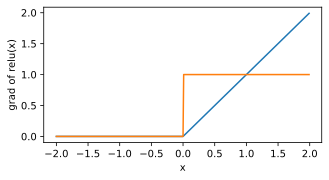

In [107]:
def xyplot(x_vals, y_vals,name):
    d2l.set_figsize(figsize=(5, 2.5))
    d2l.plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')

# relu的图像
x = torch.arange(-2.0, 2.0, 0.01, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')

# relu的梯度的图像
y.sum().backward()
xyplot(x, x.grad, 'grad of relu') # 负数时梯度取0


#### 3.8.2.2 sigmoid函数

sigmoid函数可以将元素的值变换到0和1之间：

$$\text{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

sigmoid函数在早期的神经网络中较为普遍，但它目前逐渐被更简单的ReLU函数取代。在后面“循环神经网络”一章中我们会介绍如何利用它值域在0到1之间这一特性来控制信息在神经网络中的流动。下面绘制了sigmoid函数。当输入接近0时，sigmoid函数接近线性变换。

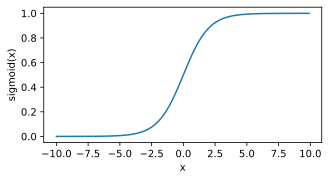

In [114]:
a = torch.arange(-10.0, 10.0, 0.1, requires_grad=True)
b = a.sigmoid()
xyplot(a, b, 'sigmoid')


依据链式法则，sigmoid函数的导数

$$\text{sigmoid}'(x) = \text{sigmoid}(x)\left(1-\text{sigmoid}(x)\right).$$


下面绘制了sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0。

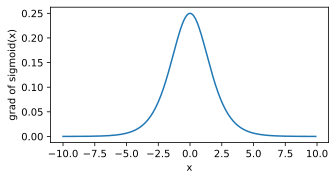

In [116]:
with torch.no_grad():
    pass
# 等价于 a.grad.zero_() 
# 即梯度归零的表达
b.sum().backward()
xyplot(a,a.grad, 'grad of sigmoid')

#### 3.8.2.3 tanh函数

tanh（双曲正切）函数可以将元素的值变换到-1和1之间：

$$\text{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

我们接着绘制tanh函数。当输入接近0时，tanh函数接近线性变换。虽然该函数的形状和sigmoid函数的形状很像，但tanh函数在坐标系的原点上对称。


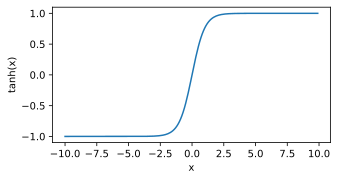

In [118]:
x = torch.arange(-10.0, 10.0, 0.1, requires_grad=True)
y = x.tanh()
xyplot(x, y, 'tanh')

依据链式法则，tanh函数的导数

$$\text{tanh}'(x) = 1 - \text{tanh}^2(x).$$

下面绘制了tanh函数的导数。当输入为0时，tanh函数的导数达到最大值1；当输入越偏离0时，tanh函数的导数越接近0。

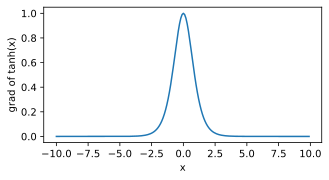

In [121]:
with torch.no_grad():
    pass
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')

### 3.8.3 多层感知机

多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换。多层感知机的层数和各隐藏层中隐藏单元个数都是超参数。以单隐藏层为例并沿用本节之前定义的符号，多层感知机按以下方式计算输出：

$$
\begin{aligned}
\boldsymbol{H} &= \phi(\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h),\\
\boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o,
\end{aligned}
$$
 
其中$\phi$表示激活函数。在分类问题中，我们可以对输出$\boldsymbol{O}$做softmax运算，并使用softmax回归中的交叉熵损失函数。
在回归问题中，我们将输出层的输出个数设为1，并将输出$\boldsymbol{O}$直接提供给线性回归中使用的平方损失函数。



## 小结

* 多层感知机在输出层与输入层之间加入了一个或多个全连接隐藏层，并通过激活函数对隐藏层输出进行变换。
* 常用的激活函数包括ReLU函数、sigmoid函数和tanh函数。

## 3.9 多层感知机的从零开始实现

In [142]:
##读数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 定义模型参数
num_inputs = 784 # h * w
num_outputs = 10 # 类别数
num_hiddens = 256 # 隐藏层数量

W1 = torch.tensor(np.random.normal(0,0.01, (num_inputs, num_hiddens)), dtype = torch.float)
W2 = torch.tensor(np.random.normal(0,0.01,(num_hiddens,num_outputs)), dtype= torch.float)

b1 = torch.zeros(num_hiddens ,dtype=torch.float)
b2 = torch.zeros(num_outputs ,dtype=torch.float)

params = [W1,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad = True)

## 定义激活函数
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

## 定义模型
def net(X):
    X = X.view((-1,num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2

## 定义损失函数
loss = torch.nn.CrossEntropyLoss()

## 训练模型
num_epochs = 3
lr = 100 # d2l.sgd函数在更新的时候除以了batch_size

def sgd(params, lr, batch_size):
    for param in params:
        # 注意这里改的是param.data
        param.data -= lr * param.grad / batch_size

def train_ch3(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum = 0.0
        train_acc_sum = 0.0
        n = 0

        for X,y in train_iter:
            y_hat = net(X) # y_hat是答案
            l = loss(y_hat,y).sum()

            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()

            l.backward()
            if optimizer is None:
                sgd(params,lr,batch_size)
            else:
                optimizer.step() 

            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == True).sum().item()
            n += y.shape[0]

        test_acc = evaluate_accuracy(test_iter,net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f' % (epoch + 1, train_l_sum / n, train_acc_sum / n,
test_acc))

## 训练
train_ch3(net, train_iter, test_iter, loss, num_epochs,
batch_size, params, lr)

epoch 1, loss 0.0031, train acc 0.099, test acc 0.836
epoch 2, loss 0.0019, train acc 0.099, test acc 0.844
epoch 3, loss 0.0017, train acc 0.099, test acc 0.855


## 3.10多层感知机的简洁实现

In [144]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x): # x shape: (batch, *, *, ...)
        return x.view(x.shape[0], -1)

## 定义模型
net = nn.Sequential(
    FlattenLayer(),
    nn.Linear(num_inputs, num_hiddens),
    nn.ReLU(),
    nn.Linear(num_hiddens,num_outputs)
)

## 读取数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

## 损失函数
loss = torch.nn.CrossEntropyLoss()

## 优化器
optimizer = torch.optim.SGD(net.parameters(), lr = 0.05)
# Note: 这里的SGD和自己定义的sgd不同，所以学习率正常

num_epochs = 3
## 训练
train_ch3(net, train_iter, test_iter, loss, num_epochs,
batch_size, None,None,optimizer)

epoch 1, loss 0.0041, train acc 0.099, test acc 0.750
epoch 2, loss 0.0025, train acc 0.097, test acc 0.789
epoch 3, loss 0.0021, train acc 0.098, test acc 0.824


## 3.11 模型选择、⽋拟合和过拟合

区分训练误差（training error）和泛化误差（generalization
error）。通俗来讲，前者指模型在训练数据集上表现出的误差，后者指模型在任意⼀个测试数据样本上
表现出的误差的期望，并常常通过测试数据集上的误差来近似。

在机器学习⾥，我们通常假设训练数据集（训练题）和测试数据集（测试题）⾥的每⼀个样本都是从同
⼀个概率分布中相互独⽴地⽣成的。基于该独⽴同分布假设，给定任意⼀个机器学习模型（含参数），
它的训练误差的期望和泛化误差都是⼀样的。例如，如果我们将模型参数设成随机值（⼩学⽣），那么
训练误差和泛化误差会⾮常相近。但我们从前⾯⼏节中已经了解到，模型的参数是通过在训练数据集上
训练模型⽽学习出的，参数的选择依据了最⼩化训练误差（⾼三备考⽣）。所以，训练误差的期望⼩于
或等于泛化误差。也就是说，⼀般情况下，由训练数据集学到的模型参数会使模型在训练数据集上的表
现优于或等于在测试数据集上的表现。由于⽆法从训练误差估计泛化误差，⼀味地降低训练误差并不意
味着泛化误差⼀定会降低。
机器学习模型应关注降低泛化误差。

### 3.11.2 模型选择
在机器学习中，通常需要评估若⼲候选模型的表现并从中选择模型。这⼀过程称为模型选择（model
selection）。可供选择的候选模型可以是有着不同超参数的同类模型。以多层感知机为例，我们可以选
择隐藏层的个数，以及每个隐藏层中隐藏单元个数和激活函数。为了得到有效的模型，我们通常要在模
型选择上下⼀番功夫。下⾯，我们来描述模型选择中经常使⽤的验证数据集（validation data set）。

#### 3.11.2.1 验证数据集
从严格意义上讲，测试集只能在所有超参数和模型参数选定后使⽤⼀次。不可以使⽤测试数据选择模型，如调参。

由于⽆法从训练误差估计泛化误差，因此也不应只依赖训练数据选择模型。鉴于此，我们可以预留⼀部分在训练数据集和测试数据集以外的数据来进⾏模型选择。这部分数据被称为验证数据集，简称验证集（validation set）。

例如，我们可以从给定的训练集中随机选取⼀⼩部分作为验证集，⽽将剩余部分作为真正的训练集。

然⽽在实际应⽤中，由于数据不容易获取，测试数据极少只使⽤⼀次就丢弃。

因此，实践中验证数据集和测试数据集的界限可能⽐较模糊。

从严格意义上讲，除⾮明确说明，否则本书中实验所使⽤的测试集
应为验证集，实验报告的测试结果（如测试准确率）应为验证结果（如验证准确率）。

#### 3.11.2.3 折交叉验证
由于验证数据集不参与模型训练，当训练数据不够⽤时，预留⼤量的验证数据显得太奢侈。⼀种改善的
⽅法是 折交叉验证（ -fold cross-validation）。在 折交叉验证中，我们把原始训练数据集分割成
 个不᯿合的⼦数据集，然后我们做 次模型训练和验证。每⼀次，我们使⽤⼀个⼦数据集验证模型，
并使⽤其他 个⼦数据集来训练模型。在这 次训练和验证中，每次⽤来验证模型的⼦数据集都不
同。最后，我们对这 次训练误差和验证误差分别求平均。

### 3.11.3 ⽋拟合和过拟合
究模型训练中经常出现的两类典型问题：⼀类是模型⽆法得到较低的训练误差，我们
将这⼀现象称作⽋拟合（underfitting）；另⼀类是模型的训练误差远⼩于它在测试数据集上的误差，
我们称该现象为过拟合（overfitting）。在实践中，我们要尽可能同时应对⽋拟合和过拟合。虽然有很
多因素可能导致这两种拟合问题，在这⾥我们᯿点讨论两个因素：模型复杂度和训练数据集⼤⼩

### 3.11.3.1 模型复杂度

为了解释模型复杂度，我们以多项式函数拟合为例。给定一个由标量数据特征$x$和对应的标量标签$y$组成的训练数据集，多项式函数拟合的目标是找一个$K$阶多项式函数

$$
\hat{y} = b + \sum_{k=1}^K x^k w_k
$$

来近似 $y$。在上式中，$w_k$是模型的权重参数，$b$是偏差参数。与线性回归相同，多项式函数拟合也使用平方损失函数。特别地，一阶多项式函数拟合又叫线性函数拟合。

因为高阶多项式函数模型参数更多，模型函数的选择空间更大，所以高阶多项式函数比低阶多项式函数的复杂度更高。因此，高阶多项式函数比低阶多项式函数更容易在相同的训练数据集上得到更低的训练误差。给定训练数据集，模型复杂度和误差之间的关系通常如图3.4所示。给定训练数据集，如果模型的复杂度过低，很容易出现欠拟合；如果模型复杂度过高，很容易出现过拟合。应对欠拟合和过拟合的一个办法是针对数据集选择合适复杂度的模型。

<img style="float: center;" src="./img/Snipaste_2021-08-13_22-18-42.png" width=250 height=200>

#### 3.11.3.2 训练数据集⼤⼩
影响⽋拟合和过拟合的另⼀个因素是训练数据集的⼤⼩。
⼀般来说，如果训练数据集中样本数过少，特别是⽐模型参数数量（按元素计）更少时，过拟合更容易发⽣。

此外，泛化误差不会随训练数据集⾥样本数量增加⽽增⼤。

因此，在计算资源允许的范围之内，我们通常希望训练数据集⼤⼀些，特别是在模型复杂度较⾼时，例如层数较多的深度学习模型

### 3.11.4 多项式函数拟合实验

#### 3.11.4.1 生成数据集

生成一个人工数据集。
在训练数据集和测试数据集中，给定样本特征$x$，我们使用如下的三阶多项式函数来生成该样本的标签：

$$y = 1.2x - 3.4x^2 + 5.6x^3 + 5 + \epsilon,$$

其中噪声项$\epsilon$服从均值为0、标准差为0.01的正态分布。训练数据集和测试数据集的样本数都设为100

In [156]:
n_train = 100
n_test = 100
true_w = [1.2,-3.4,5.6]
true_b = 5

features = torch.randn((n_train + n_test,1))
poly_features = torch.cat((features, torch.pow(features, 2),torch.pow(features, 3)), 1)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1] + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0,0.01, size = labels.size()),dtype = torch.float)


#### 3.11.4.2 定义、训练和测试模型

In [160]:
# 作图函数
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None,
y2_vals=None,legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [204]:
num_epochs = 100
loss = torch.nn.MSELoss()

def fit_and_plot(train_features,test_features,train_labels,test_labels):
    # 定义模型
    net = torch.nn.Linear(train_features.shape[-1],1)

    batch_size = min(10, train_labels.shape[0])
    # 把feat和labels整合到一起
    dataset = torch.utils.data.TensorDataset(train_features,
train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size,
shuffle=True)

    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features),train_labels).item())
        test_ls.append(loss(net(test_features),test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss',test_ls[-1])

    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,'\nbias:', net.bias.data)

final epoch: train loss 8.217550202971324e-05 test loss 9.631043212721124e-05
weight: tensor([[ 1.2010, -3.4009,  5.6000]]) 
bias: tensor([5.0000])


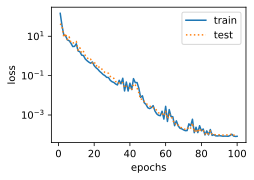

In [212]:
### 3.11.4.3 三阶多项式函数拟合（正常）
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],labels[:n_train], labels[n_train:])

final epoch: train loss 255.365234375 test loss 216.45103454589844
weight: tensor([[19.1100]]) 
bias: tensor([3.5266])


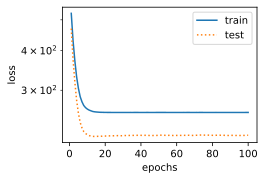

In [213]:
#### 3.11.4.4 线性函数拟合（⽋拟合）
# 很明显，该模型的训练误差在迭代早期下降后便很难继续降低。在完成最后⼀次迭代周期后，训练误差依旧很⾼
# 线性模型在⾮线性模型（如三阶多项式函数）⽣成的数据集上容易⽋拟合。

fit_and_plot(features[:n_train, :], features[n_train:, :],
labels[:n_train], labels[n_train:])

final epoch: train loss 6.82907772064209 test loss 250.49485778808594
weight: tensor([[ 1.2655, -1.5162,  1.7029]]) 
bias: tensor([1.1825])


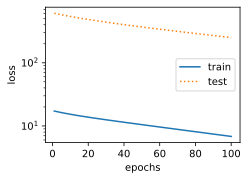

In [214]:
#### 3.11.4.5 训练样本不⾜（过拟合
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :],
labels[0:2],labels[n_train:])

### ⼩结

* 由于无法从训练误差估计泛化误差，一味地降低训练误差并不意味着泛化误差一定会降低。机器学习模型应关注降低泛化误差。
* 可以使用验证数据集来进行模型选择。
* 欠拟合指模型无法得到较低的训练误差，过拟合指模型的训练误差远小于它在测试数据集上的误差。
* 应选择复杂度合适的模型并避免使用过少的训练样本。

## 3.12权重衰减


### 3.12.1 方法
权重衰减等价于 $L_2$ 范数正则化（regularization）。正则化通过为模型损失函数添加惩罚项使学出的模型参数值较小，是应对过拟合的常用手段。

$L_2$范数正则化在模型原损失函数基础上添加$L_2$范数惩罚项，从而得到训练所需要最小化的函数。$L_2$范数惩罚项指的是模型权重参数每个元素的平方和与一个正的常数的乘积。以3.1节（线性回归）中的线性回归损失函数

$$
\ell(w_1, w_2, b) = \frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right)^2
$$

为例，其中$w_1, w_2$是权重参数，$b$是偏差参数，样本$i$的输入为$x_1^{(i)}, x_2^{(i)}$，标签为$y^{(i)}$，样本数为$n$。将权重参数用向量$\boldsymbol{w} = [w_1, w_2]$表示，带有$L_2$范数惩罚项的新损失函数为

$$\ell(w_1, w_2, b) + \frac{\lambda}{2n} \|\boldsymbol{w}\|^2,$$

其中超参数$\lambda > 0$。当权重参数均为0时，惩罚项最小。当$\lambda$较大时，惩罚项在损失函数中的比重较大，这通常会使学到的权重参数的元素较接近0。当$\lambda$设为0时，惩罚项完全不起作用。上式中$L_2$范数平方$\|\boldsymbol{w}\|^2$展开后得到$w_1^2 + w_2^2$。有了$L_2$范数惩罚项后，在小批量随机梯度下降中，我们将线性回归一节中权重$w_1$和$w_2$的迭代方式更改为

$$
\begin{aligned}
w_1 &\leftarrow \left(1- \frac{\eta\lambda}{|\mathcal{B}|} \right)w_1 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_1^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right),\\
w_2 &\leftarrow \left(1- \frac{\eta\lambda}{|\mathcal{B}|} \right)w_2 -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}x_2^{(i)} \left(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}\right).
\end{aligned}
$$

可见，$L_2$范数正则化令权重$w_1$和$w_2$先自乘小于1的数，再减去不含惩罚项的梯度。因此，$L_2$范数正则化又叫权重衰减。权重衰减通过惩罚绝对值较大的模型参数为需要学习的模型增加了限制，这可能对过拟合有效。实际场景中，我们有时也在惩罚项中添加偏差元素的平方和。

### 3.12.2 高维线性回归实验

下面，我们以高维线性回归为例来引入一个过拟合问题，并使用权重衰减来应对过拟合。设数据样本特征的维度为$p$。对于训练数据集和测试数据集中特征为$x_1, x_2, \ldots, x_p$的任一样本，我们使用如下的线性函数来生成该样本的标签：

$$
y = 0.05 + \sum_{i = 1}^p 0.01x_i +  \epsilon
$$

其中噪声项$\epsilon$服从均值为0、标准差为0.01的正态分布。为了较容易地观察过拟合，我们考虑高维线性回归问题，如设维度$p=200$；同时，我们特意把训练数据集的样本数设低，如20。

In [11]:
# 初始化数据集
n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0,0.01,size = labels.size()),dtype = torch.float)
train_features = features[:n_train,:]
test_features = features[n_train:,:]

train_labels = labels[:n_train,:]
test_labels = labels[n_train:,:]

# 初始化模型参数
def init_params():
    W = torch.randn((num_inputs,1), requires_grad=True)
    b = torch.zeros(1,requires_grad=True)
    return [W,b]

# 定义L2范数惩罚项
def l2_penalty(W):
    return (W**2).sum() /2

# 定义训练和测试
def linreg(X, w, b):
    return torch.mm(X, w) + b

def squared_loss(y_hat, y): 
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return ((y_hat - y.view(y_hat.size())) ** 2) / 2

def sgd(params, lr, batch_size):
    # 为了和原书保持一致，这里除以了batch_size，但是应该是不用除的，因为一般用PyTorch计算loss时就默认已经
    # 沿batch维求了平均了。
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    set_figsize(figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)
    # plt.show()

batch_size = 1
num_epochs = 100
lr = 0.003
net = d2l.linreg
loss = d2l.squared_loss

dataset = torch.utils.data.TensorDataset(train_features, train_labels)
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

def fit_and_plot(lambd):
    w,b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X,w,b), y) + lambd * l2_penalty(w)
            l = l.sum()

            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            d2l.sgd([w, b], lr, batch_size)

        train_ls.append(loss(net(train_features, w, b),train_labels).mean().item())
        test_ls.append(loss(net(test_features, w, b),test_labels).mean().item())
    
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs',
'loss', range(1, num_epochs + 1), test_ls, ['train','test'])
    print('L2 norm of w:', w.norm().item())

L2 norm of w: 12.333868026733398


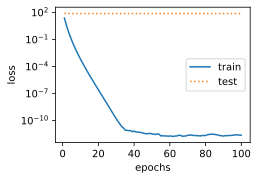

In [12]:
# 无权重衰减时，出现过拟合
fit_and_plot(lambd=0)

L2 norm of w: 0.02207682467997074


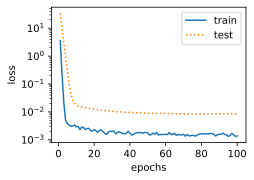

In [18]:
# 使用权重衰减
fit_and_plot(lambd=10)

In [20]:
# 简洁实现
# weight_decay 参数指定权重衰减超参数
# 默认下，PyTorch会对权᯿和偏差同时衰减。我们可以分别对权᯿和偏差构造优化器实例，从⽽只对权᯿衰减。

def fit_and_plot_pytorch(wd):
    # 对权᯿参数衰减。权᯿名称⼀般是以weight结尾
    net = nn.Linear(num_inputs,1)
    nn.init.normal_(net.weight,mean=0,std=1)
    nn.init.normal_(net.bias,mean=0,std=1)
    # 对权᯿参数衰减
    optimizer_w = torch.optim.SGD(params = [net.weight], lr = lr,weight_decay = wd)     
    # 不对偏差参数衰减
    optimizer_b = torch.optim.SGD(params=[net.bias], lr=lr) 

    train_ls,test_ls = [],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X),y).mean()

            optimizer_w.zero_grad()
            optimizer_b.zero_grad()
            l.backward()
            optimizer_w.step()
            optimizer_b.step()
        
        train_ls.append(loss(net(train_features),train_labels).mean().item())
        test_ls.append(loss(net(test_features),test_labels).mean().item())
    
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs',
'loss',range(1, num_epochs + 1), test_ls, ['train','test'])
    
    print('L2 norm of w:', net.weight.data.norm().item())


L2 norm of w: 0.017534703016281128


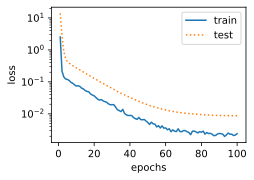

In [22]:
fit_and_plot_pytorch(15)

### 小结

* 正则化通过为模型损失函数添加惩罚项使学出的模型参数值较小，是应对过拟合的常用手段。
* 权重衰减等价于$L_2$范数正则化，通常会使学到的权重参数的元素较接近0。
* 权重衰减可以通过优化器中的`weight_decay`超参数来指定。
* 可以定义多个优化器实例对不同的模型参数使用不同的迭代方法。

## 3.13 丢弃法

除了前一节介绍的权重衰减以外，深度学习模型常常使用丢弃法（dropout）[1] 来应对过拟合问题。丢弃法有一些不同的变体。本节中提到的丢弃法特指倒置丢弃法（inverted dropout）。

Note: 丢弃法只在训练模型时使⽤。

### 3.13.1 方法

回忆一下，3.8节（多层感知机）的图3.3描述了一个单隐藏层的多层感知机。其中输入个数为4，隐藏单元个数为5，且隐藏单元$h_i$（$i=1, \ldots, 5$）的计算表达式为

$$
h_i = \phi\left(x_1 w_{1i} + x_2 w_{2i} + x_3 w_{3i} + x_4 w_{4i} + b_i\right)
$$

这里$\phi$是激活函数，$x_1, \ldots, x_4$是输入，隐藏单元$i$的权重参数为$w_{1i}, \ldots, w_{4i}$，偏差参数为$b_i$。当对该隐藏层使用丢弃法时，该层的隐藏单元将有一定概率被丢弃掉。设丢弃概率为$p$，那么有$p$的概率$h_i$会被清零，有$1-p$的概率$h_i$会除以$1-p$做拉伸。丢弃概率是丢弃法的超参数。具体来说，设随机变量$\xi_i$为0和1的概率分别为$p$和$1-p$。使用丢弃法时我们计算新的隐藏单元$h_i'$

$$
h_i' = \frac{\xi_i}{1-p} h_i
$$

由于$E(\xi_i) = 1-p$，因此

$$
E(h_i') = \frac{E(\xi_i)}{1-p}h_i = h_i
$$

即**丢弃法不改变其输入的期望值**。让我们对图3.3中的隐藏层使用丢弃法，一种可能的结果如图3.5所示，其中$h_2$和$h_5$被清零。这时输出值的计算不再依赖$h_2$和$h_5$，在反向传播时，与这两个隐藏单元相关的权重的梯度均为0。由于在训练中隐藏层神经元的丢弃是随机的，即$h_1, \ldots, h_5$都有可能被清零，输出层的计算无法过度依赖$h_1, \ldots, h_5$中的任一个，从而在训练模型时起到正则化的作用，并可以用来应对过拟合。在测试模型时，我们为了拿到更加确定性的结果，一般不使用丢弃法。

<img style="float: center;" src="./img/FireShot Capture 373 -  - .png" width=250 height=200>

### 3.13.2 从零开始实现

下面的`dropout`函数将以`drop_prob`的概率丢弃`X`中的元素。

In [37]:
def dropout(X,drop_prob):
    X = X.float()
    assert 0 <= drop_prob <= 1
    keep_prob = 1- drop_prob
    # 在这种情况下把全部元素都丢弃
    if  keep_prob == 0:
        return torch.zeros_like(X)
    mask = (torch.randn(X.shape) < keep_prob).float()
    return mask * X /keep_prob

#### 3.13.2.1 定义模型参数

实验中，我们依然使用3.6节（softmax回归的从零开始实现）中介绍的Fashion-MNIST数据集。我们将定义一个包含两个隐藏层的多层感知机，其中两个隐藏层的输出个数都是256。

In [41]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256,256

W1 = torch.tensor(np.random.normal(0, 0.01, size=(num_inputs,
num_hiddens1)), dtype=torch.float, requires_grad=True)
b1 = torch.zeros(num_hiddens1, requires_grad=True)
W2 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens1,
num_hiddens2)), dtype=torch.float, requires_grad=True)
b2 = torch.zeros(num_hiddens2, requires_grad=True)
W3 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens2,
num_outputs)), dtype=torch.float, requires_grad=True)
b3 = torch.zeros(num_outputs, requires_grad=True)
params = [W1, b1, W2, b2, W3, b3]

In [43]:
drop_prob1, drop_prob2 = 0.2, 0.5

def net(X, is_training=True):
    X = X.view(-1, num_inputs)
    H1 = (torch.matmul(X, W1) + b1).relu()
    if is_training: # 只在训练模型时使⽤丢弃法
        H1 = dropout(H1, drop_prob1) # 在第⼀层全连接后添加丢弃层
    H2 = (torch.matmul(H1, W2) + b2).relu()
    if is_training:
        H2 = dropout(H2, drop_prob2) # 在第⼆层全连接后添加丢弃层
    return torch.matmul(H2, W3) + b3

def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        if isinstance(net, torch.nn.Module):
            net.eval() # 评估模式, 这会关闭dropout
            acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
            net.train() # 改回训练模式
        else: # ⾃定义的模型
            if('is_training' in net.__code__.co_varnames): # 如果有is_training这个参数
                # 将is_training设置成False
                acc_sum += (net(X, is_training=False).argmax(dim=1) == y).float().sum().item()
            else:
                acc_sum += (net(X).argmax(dim=1) ==y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

#  训练和测试模型
num_epochs, lr, batch_size = 5, 100.0, 256
loss = torch.nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,batch_size, params, lr)

epoch 1, loss 0.0045, train acc 0.569, test acc 0.766
epoch 2, loss 0.0022, train acc 0.790, test acc 0.783
epoch 3, loss 0.0019, train acc 0.826, test acc 0.797
epoch 4, loss 0.0017, train acc 0.840, test acc 0.822
epoch 5, loss 0.0016, train acc 0.850, test acc 0.844


In [45]:
# 简洁实现
# 在PyTorch中，我们只需要在全连接层后添加 Dropout 层并指定丢弃概率。
# 在训练模型时， Dropout层将以指定的丢弃概率随机丢弃上⼀层的输出元素；
# 在测试模型时（即 model.eval()后）， Dropout 层并不发挥作⽤

net = nn.Sequential(
    d2l.FlattenLayer(),
    nn.Linear(num_inputs,num_hiddens1),
    nn.ReLU(),
    nn.Dropout(drop_prob1),
    nn.Linear(num_hiddens1, num_hiddens2),
    nn.ReLU(),
    nn.Dropout(drop_prob2),
    nn.Linear(num_hiddens2,10)
)

for param in net.parameters():
    nn.init.normal(param,mean = 0, std = 0.01)

<ipython-input-45-3a74b2cf9f8d>:18: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  nn.init.normal(param,mean = 0, std = 0.01)


In [46]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,batch_size, None, None, optimizer)

epoch 1, loss 0.0048, train acc 0.525, test acc 0.742
epoch 2, loss 0.0023, train acc 0.777, test acc 0.738
epoch 3, loss 0.0020, train acc 0.817, test acc 0.804
epoch 4, loss 0.0018, train acc 0.837, test acc 0.839
epoch 5, loss 0.0017, train acc 0.845, test acc 0.838


## 3.14 正向传播、反向传播和计算图

前面几节里我们使用了小批量随机梯度下降的优化算法来训练模型。在实现中，我们只提供了模型的正向传播（forward propagation）的计算，即对输入计算模型输出，然后通过`autograd`模块来调用系统自动生成的`backward`函数计算梯度。基于反向传播（back-propagation）算法的自动求梯度极大简化了深度学习模型训练算法的实现。本节我们将使用数学和计算图（computational graph）两个方式来描述正向传播和反向传播。具体来说，我们将以带$L_2$范数正则化的含单隐藏层的多层感知机为样例模型解释正向传播和反向传播。

###  3.14.1 正向传播

正向传播是指对神经网络沿着从输入层到输出层的顺序，依次计算并存储模型的中间变量（包括输出）。为简单起见，假设输入是一个特征为$\boldsymbol{x} \in \mathbb{R}^d$的样本，且不考虑偏差项，那么中间变量

$$\boldsymbol{z} = \boldsymbol{W}^{(1)} \boldsymbol{x},$$

其中$\boldsymbol{W}^{(1)} \in \mathbb{R}^{h \times d}$是隐藏层的权重参数。把中间变量$\boldsymbol{z} \in \mathbb{R}^h$输入按元素运算的激活函数$\phi$后，将得到向量长度为$h$的隐藏层变量

$$\boldsymbol{h} = \phi (\boldsymbol{z}).$$

隐藏层变量$\boldsymbol{h}$也是一个中间变量。假设输出层参数只有权重$\boldsymbol{W}^{(2)} \in \mathbb{R}^{q \times h}$，可以得到向量长度为$q$的输出层变量

$$\boldsymbol{o} = \boldsymbol{W}^{(2)} \boldsymbol{h}.$$

假设损失函数为$\ell$，且样本标签为$y$，可以计算出单个数据样本的损失项

$$L = \ell(\boldsymbol{o}, y).$$

根据$L_2$范数正则化的定义，给定超参数$\lambda$，正则化项即

$$s = \frac{\lambda}{2} \left(\|\boldsymbol{W}^{(1)}\|_F^2 + \|\boldsymbol{W}^{(2)}\|_F^2\right),$$

其中矩阵的Frobenius范数等价于将矩阵变平为向量后计算$L_2$范数。最终，模型在给定的数据样本上带正则化的损失为

$$J = L + s.$$

我们将$J$称为有关给定数据样本的目标函数，并在以下的讨论中简称目标函数。


###  3.14.2 正向传播的计算图

我们通常绘制计算图来可视化运算符和变量在计算中的依赖关系。图3.6绘制了本节中样例模型正向传播的计算图，其中左下角是输入，右上角是输出。可以看到，图中箭头方向大多是向右和向上，其中方框代表变量，圆圈代表运算符，箭头表示从输入到输出之间的依赖关系。

<img style="float: center;" src="./img/FireShot Capture 374 -  - .png" >

###  3.14.3 反向传播

反向传播指的是计算神经网络参数梯度的方法。总的来说，反向传播依据微积分中的链式法则，沿着从输出层到输入层的顺序，依次计算并存储目标函数有关神经网络各层的中间变量以及参数的梯度。对输入或输出$\mathsf{X}, \mathsf{Y}, \mathsf{Z}$为任意形状张量的函数$\mathsf{Y}=f(\mathsf{X})$和$\mathsf{Z}=g(\mathsf{Y})$，通过链式法则，我们有

$$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \text{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right),$$

其中$\text{prod}$运算符将根据两个输入的形状，在必要的操作（如转置和互换输入位置）后对两个输入做乘法。

回顾一下本节中样例模型，它的参数是$\boldsymbol{W}^{(1)}$和$\boldsymbol{W}^{(2)}$，因此反向传播的目标是计算$\partial J/\partial \boldsymbol{W}^{(1)}$和$\partial J/\partial \boldsymbol{W}^{(2)}$。我们将应用链式法则依次计算各中间变量和参数的梯度，其计算次序与前向传播中相应中间变量的计算次序恰恰相反。首先，分别计算目标函数$J=L+s$有关损失项$L$和正则项$s$的梯度

$$\frac{\partial J}{\partial L} = 1, \quad \frac{\partial J}{\partial s} = 1.$$

其次，依据链式法则计算目标函数有关输出层变量的梯度$\partial J/\partial \boldsymbol{o} \in \mathbb{R}^q$：

$$
\frac{\partial J}{\partial \boldsymbol{o}}
= \text{prod}\left(\frac{\partial J}{\partial L}, \frac{\partial L}{\partial \boldsymbol{o}}\right)
= \frac{\partial L}{\partial \boldsymbol{o}}.
$$


接下来，计算正则项有关两个参数的梯度：

$$\frac{\partial s}{\partial \boldsymbol{W}^{(1)}} = \lambda \boldsymbol{W}^{(1)},\quad\frac{\partial s}{\partial \boldsymbol{W}^{(2)}} = \lambda \boldsymbol{W}^{(2)}.$$


现在，我们可以计算最靠近输出层的模型参数的梯度$\partial J/\partial \boldsymbol{W}^{(2)} \in \mathbb{R}^{q \times h}$。依据链式法则，得到

$$
\frac{\partial J}{\partial \boldsymbol{W}^{(2)}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{o}}, \frac{\partial \boldsymbol{o}}{\partial \boldsymbol{W}^{(2)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \boldsymbol{W}^{(2)}}\right)
= \frac{\partial J}{\partial \boldsymbol{o}} \boldsymbol{h}^\top + \lambda \boldsymbol{W}^{(2)}.
$$


沿着输出层向隐藏层继续反向传播，隐藏层变量的梯度$\partial J/\partial \boldsymbol{h} \in \mathbb{R}^h$可以这样计算：

$$
\frac{\partial J}{\partial \boldsymbol{h}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{o}}, \frac{\partial \boldsymbol{o}}{\partial \boldsymbol{h}}\right)
= {\boldsymbol{W}^{(2)}}^\top \frac{\partial J}{\partial \boldsymbol{o}}.
$$


由于激活函数$\phi$是按元素运算的，中间变量$\boldsymbol{z}$的梯度$\partial J/\partial \boldsymbol{z} \in \mathbb{R}^h$的计算需要使用按元素乘法符$\odot$：

$$
\frac{\partial J}{\partial \boldsymbol{z}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{h}}, \frac{\partial \boldsymbol{h}}{\partial \boldsymbol{z}}\right)
= \frac{\partial J}{\partial \boldsymbol{h}} \odot \phi'\left(\boldsymbol{z}\right).
$$

最终，我们可以得到最靠近输入层的模型参数的梯度$\partial J/\partial \boldsymbol{W}^{(1)} \in \mathbb{R}^{h \times d}$。依据链式法则，得到

$$
\frac{\partial J}{\partial \boldsymbol{W}^{(1)}}
= \text{prod}\left(\frac{\partial J}{\partial \boldsymbol{z}}, \frac{\partial \boldsymbol{z}}{\partial \boldsymbol{W}^{(1)}}\right) + \text{prod}\left(\frac{\partial J}{\partial s}, \frac{\partial s}{\partial \boldsymbol{W}^{(1)}}\right)
= \frac{\partial J}{\partial \boldsymbol{z}} \boldsymbol{x}^\top + \lambda \boldsymbol{W}^{(1)}.
$$

###  3.14.4 训练深度学习模型

在训练深度学习模型时，正向传播和反向传播之间相互依赖。下面我们仍然以本节中的样例模型分别阐述它们之间的依赖关系。

一方面，正向传播的计算可能依赖于模型参数的当前值，而这些模型参数是在反向传播的梯度计算后通过优化算法迭代的。例如，计算正则化项$s = (\lambda/2) \left(\|\boldsymbol{W}^{(1)}\|_F^2 + \|\boldsymbol{W}^{(2)}\|_F^2\right)$依赖模型参数$\boldsymbol{W}^{(1)}$和$\boldsymbol{W}^{(2)}$的当前值，而这些当前值是优化算法最近一次根据反向传播算出梯度后迭代得到的。

另一方面，反向传播的梯度计算可能依赖于各变量的当前值，而这些变量的当前值是通过正向传播计算得到的。举例来说，参数梯度$\partial J/\partial \boldsymbol{W}^{(2)} = (\partial J / \partial \boldsymbol{o}) \boldsymbol{h}^\top + \lambda \boldsymbol{W}^{(2)}$的计算需要依赖隐藏层变量的当前值$\boldsymbol{h}$。这个当前值是通过从输入层到输出层的正向传播计算并存储得到的。

因此，在模型参数初始化完成后，我们交替地进行正向传播和反向传播，并根据反向传播计算的梯度迭代模型参数。既然我们在反向传播中使用了正向传播中计算得到的中间变量来避免重复计算，那么这个复用也导致正向传播结束后不能立即释放中间变量内存。这也是训练要比预测占用更多内存的一个重要原因。另外需要指出的是，这些中间变量的个数大体上与网络层数线性相关，每个变量的大小跟批量大小和输入个数也是线性相关的，它们是导致较深的神经网络使用较大批量训练时更容易超内存的主要原因。


###  小结

* 正向传播沿着从输入层到输出层的顺序，依次计算并存储神经网络的中间变量。
* 反向传播沿着从输出层到输入层的顺序，依次计算并存储神经网络中间变量和参数的梯度。
* 在训练深度学习模型时，正向传播和反向传播相互依赖。

## 3.15 数值稳定性和模型初始化

深度模型有关数值稳定性的典型问题是衰减（vanishing）和爆炸（explosion）。

### 3.15.1 衰减和爆炸

当神经网络的层数较多时，模型的数值稳定性容易变差。假设一个层数为$L$的多层感知机的第$l$层$\boldsymbol{H}^{(l)}$的权重参数为$\boldsymbol{W}^{(l)}$，输出层$\boldsymbol{H}^{(L)}$的权重参数为$\boldsymbol{W}^{(L)}$。为了便于讨论，不考虑偏差参数，且设所有隐藏层的激活函数为恒等映射（identity mapping）$\phi(x) = x$。给定输入$\boldsymbol{X}$，多层感知机的第$l$层的输出$\boldsymbol{H}^{(l)} = \boldsymbol{X} \boldsymbol{W}^{(1)} \boldsymbol{W}^{(2)} \ldots \boldsymbol{W}^{(l)}$。此时，如果层数$l$较大，$\boldsymbol{H}^{(l)}$的计算可能会出现衰减或爆炸。举个例子，假设输入和所有层的权重参数都是标量，如权重参数为0.2和5，多层感知机的第30层输出为输入$\boldsymbol{X}$分别与$0.2^{30} \approx 1 \times 10^{-21}$（衰减）和$5^{30} \approx 9 \times 10^{20}$（爆炸）的乘积。类似地，当层数较多时，梯度的计算也更容易出现衰减或爆炸。

 


### 3.15.2 随机初始化模型参数

在神经网络中，通常需要随机初始化模型参数。下面我们来解释这样做的原因。

回顾3.8节（多层感知机）图3.3描述的多层感知机。为了方便解释，假设输出层只保留一个输出单元$o_1$（删去$o_2$和$o_3$以及指向它们的箭头），且隐藏层使用相同的激活函数。如果将每个隐藏单元的参数都初始化为相等的值，那么在正向传播时每个隐藏单元将根据相同的输入计算出相同的值，并传递至输出层。在反向传播中，每个隐藏单元的参数梯度值相等。因此，这些参数在使用基于梯度的优化算法迭代后值依然相等。之后的迭代也是如此。在这种情况下，无论隐藏单元有多少，隐藏层本质上只有1个隐藏单元在发挥作用。因此，正如在前面的实验中所做的那样，我们通常将神经网络的模型参数，特别是权重参数，进行随机初始化。


#### 3.15.2.1 PyTorch的默认随机初始化

随机初始化模型参数的方法有很多。在3.3节（线性回归的简洁实现）中，我们使用`torch.nn.init.normal_()`使模型`net`的权重参数采用正态分布的随机初始化方式。不过，PyTorch中`nn.Module`的模块参数都采取了较为合理的初始化策略（不同类型的layer具体采样的哪一种初始化方法的可参考[源代码](https://github.com/pytorch/pytorch/tree/master/torch/nn/modules)），因此一般不用我们考虑。


#### 3.15.2.2 Xavier随机初始化

还有一种比较常用的随机初始化方法叫作Xavier随机初始化[1]。
假设某全连接层的输入个数为$a$，输出个数为$b$，Xavier随机初始化将使该层中权重参数的每个元素都随机采样于均匀分布

$$U\left(-\sqrt{\frac{6}{a+b}}, \sqrt{\frac{6}{a+b}}\right).$$

它的设计主要考虑到，模型参数初始化后，每层输出的方差不该受该层输入个数影响，且每层梯度的方差也不该受该层输出个数影响。

## 小结

* 深度模型有关数值稳定性的典型问题是衰减和爆炸。当神经网络的层数较多时，模型的数值稳定性容易变差。
* 我们通常需要随机初始化神经网络的模型参数，如权重参数。
  




## 3.16 实验kaggle比赛：房价预测


In [57]:
# 导入数据
torch.set_default_tensor_type(torch.FloatTensor)

train_data = pd.read_csv('./Datasets/kaggle_house/train.csv')
test_data = pd.read_csv('./Datasets/kaggle_house/test.csv')

NameError: name 'pandas' is not defined

<module 'pandas' (namespace)>
